# Signal processing

In this script, we will extract basic features from multimodal timeseries, namely
- movement
- acoustics
- postural sway


# Folder settings and packages

In [1]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

curfolder = os.getcwd()
print(curfolder)

MTfolder = 'C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata/'
ACfolder = 'E:\charade_experiment_WORKSPACE\\xdf_procedure\data\Data_processed\Data_trials\Audio_48'
BBfolder = 'E:\charade_experiment_WORKSPACE\\xdf_procedure\data\Data_processed\Data_trials\\'

MTfolder_processed = curfolder + '/TS_motiontracking/'
ACfolder_processed = curfolder + '/TS_acoustics/'
TSmerged = curfolder + '/TS_merged/'

<>:12: SyntaxWarning: invalid escape sequence '\c'
<>:13: SyntaxWarning: invalid escape sequence '\c'
<>:12: SyntaxWarning: invalid escape sequence '\c'
<>:13: SyntaxWarning: invalid escape sequence '\c'
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\643290234.py:12: SyntaxWarning: invalid escape sequence '\c'
  ACfolder = 'E:\charade_experiment_WORKSPACE\\xdf_procedure\data\Data_processed\Data_trials\Audio_48'
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\643290234.py:13: SyntaxWarning: invalid escape sequence '\c'
  BBfolder = 'E:\charade_experiment_WORKSPACE\\xdf_procedure\data\Data_processed\Data_trials\\'


e:\FLESH_ContinuousBodilyEffort\TS_processing


# Extraction of MT features - kinematics

Note that y and z dimensions are swapped (such that z is vertical)

In [3]:
MTtotrack = glob.glob(MTfolder + '*/P*/*', recursive=True)

# get rid of all the folders that are not the ones we want to track, like .sto files
MTtotrack = [x for x in MTtotrack if 'sto' not in x]
MTtotrack = [x for x in MTtotrack if 'txt' not in x]
MTtotrack = [x for x in MTtotrack if 'xml' not in x]
MTtotrack = [x for x in MTtotrack if 'opensim' not in x]
MTtotrack = [x for x in MTtotrack if 'Results' not in x]
MTtotrack = [x for x in MTtotrack if 'toml' not in x]

print(MTtotrack)

['C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\\Session_0_1\\P0\\0_1_0_p0', 'C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\\Session_0_1\\P0\\0_1_18_p0', 'C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\\Session_0_1\\P0\\0_1_19_p0', 'C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\\Session_0_1\\P0\\0_1_1_p0', 'C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\\Session_0_1\\P0\\0_1_20_p0', 'C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\\Session_0_1\\P0\\0_1_21_p0', 'C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\\Session_0_1\\P0\\0_1_22_p0', 'C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\\Session_0_1\\P0\\0_1_23_p0', 'C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\\Session_0_1\\P0\\0_1_24_p0', 'C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\\Session_0_1\\P0\\0_1_25_p0', 'C:/Users/kadava/Documents/Gith

## Smoothing (not needed, just for deciding on smoothing strength)

In case you want to smooth the data, here is a code that allows you to compare different smoothing strengths


In [3]:
MTfiles_all = []

for folder in MTtotrack:
    print('working on:' + folder)
    # last element is trialid
    trialid = folder.split('\\')[-1]
    
    # get all csv files in the folder
    csvfiles = glob.glob(folder + '/**/*.csv', recursive=True)
    # keep only the ones that have butterworth in the name
    csvfiles = [x for x in csvfiles if 'butterworth' in x]
    butterfile = csvfiles[0]
    # append to list with trialid
    MTfiles_all.append([trialid, butterfile])

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_1\P0\0_1_0_p0
working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_1\P0\0_1_18_p0
working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_1\P0\0_1_19_p0
working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_1\P0\0_1_1_p0
working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_1\P0\0_1_20_p0
working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_1\P0\0_1_21_p0
working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_1\P0\0_1_22_p0
working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_1\P0\0_1_23_p0
working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_1\P0\0_1_24_p0
working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session

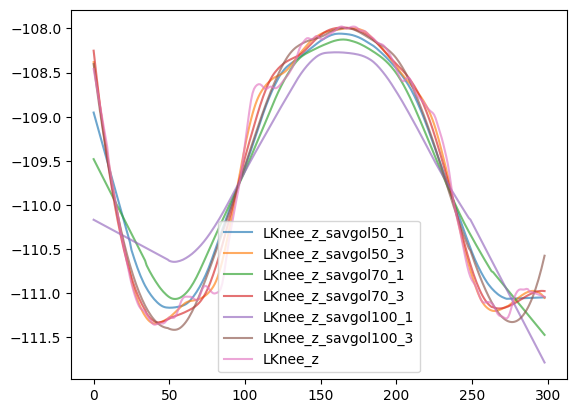

In [56]:
# smoothing with savitzky-golay filter
import scipy
import matplotlib.pyplot as plt

print(MTfiles_all[20][1])
sample = pd.read_csv(MTfiles_all[20][1], sep=',')

# list possible window
window = [50,70,100]
# list possible orders
order = [1,3]

# col of interest
samplecol = ['LKnee_x', 'LKnee_y', 'LKnee_z']

# iterate over handcols and apply all possible combinations of window and order, save it to new df
# prepare new df
df_smooth = pd.DataFrame()

for col in samplecol:
    for win in window:
        for ord in order:
            df_smooth[col + '_savgol' + str(win) + '_' + str(ord)] = scipy.signal.savgol_filter(sample[col], win, ord)


# make R_Hand_x from df_sample a list
LKnee_x = sample['LKnee_x'].tolist()
LKnee_y = sample['LKnee_y'].tolist()
LKnee_z = sample['LKnee_z'].tolist()


# load these values into df_smooth as a new column
df_smooth['LKnee_x'] = LKnee_x
df_smooth['LKnee_y'] = LKnee_y
df_smooth['LKnee_z'] = LKnee_z

#plot all R_Hand_x columns in one plot
colstoplot = [col for col in df_smooth.columns if 'LKnee_z' in col]
for col in colstoplot:
    plt.plot(df_smooth[col], label=col, alpha=0.65)
plt.legend()
# make only timewindow 50 to 250
#plt.xlim(50, 222)
plt.show()


### 15, 1 seems quite solid

# but for lower body let's try 20,1


## Getting MT data

Note that everything from now on until section 'Merging all' needs to be done with access to the original data. You can skip this part because all the processed files are already in respective folders

In [4]:
import pandas as pd
import scipy
import numpy as np


for folder in MTtotrack:
    print('working on:' + folder)
    # last element is trialid
    trialid = folder.split('\\')[-1]
    
    # get all csv files in the folder
    csvfiles = glob.glob(folder + '/**/*.csv', recursive=True)
    # keep only the ones that have butterworth in the name
    csvfiles = [x for x in csvfiles if 'butterworth' in x]
    butterfile = csvfiles[0]

    # load it
    mt = pd.read_csv(butterfile)

    # the mt is missing 0 ms timepoint, so we need to create a row that copies the first row of mt and time = 0
    padrow = mt.iloc[0].copy()
    padrow['Time'] = 0

    # concatenate it to the beginning of mt 
    mt = pd.concat([pd.DataFrame(padrow).T, mt], ignore_index=True)

    # show columns
    mtcols = mt.columns
    # put away 'Time' column from the list
    mtcols = mtcols[:-1]

    # smooth all columns except time with savgol
    colstosmooth = mtcols

    mt_smooth = pd.DataFrame()

    # upper body cols
    upperbodycols = ['Head', 'Neck', 'RShoulder', 'RElbow', 'RWrist', 'LShoulder', 'LElbow', 'LWrist']
    # lower body cols
    lowerbodycols = ['RHip', 'RKnee', 'RAnkle', 'RHeel' 'LHip', 'LKnee', 'LAnkle', 'LHeel']

    for col in colstosmooth:
        # if the col + x/y/z is in upperbodycols, smooth with 15,1
        if any(x in col for x in upperbodycols):
            mt_smooth[col] = scipy.signal.savgol_filter(mt[col], 15, 1)
        elif any(x in col for x in lowerbodycols):
            mt_smooth[col] = scipy.signal.savgol_filter(mt[col], 20, 1)
        else:
            mt_smooth[col] = scipy.signal.savgol_filter(mt[col], 15, 1)
        # and put them all to cms
        mt_smooth[col] = mt_smooth[col]*100

    # add time column
    mt_smooth['Time'] = mt['Time']

    # get sampling rate
    sr = 1/np.mean(np.diff(mt['Time']))

    # prepare cols for speed
    cols = [x.split('_')[0] for x in mtcols]
    colsforspeed = list(set(cols))

    # for each unique colname (cols), calculate speed 
    for col in colsforspeed:
        # get x and y columns
        x = mt_smooth[col + '_x']
        y = mt_smooth[col + '_y']
        z = mt_smooth[col + '_z'] # note that y and z are flipped
        # calculate speed
        mt_smooth[col + '_speed'] = np.insert(np.sqrt(np.diff(x)**2 + np.diff(y)**2 + np.diff(z)**2), 0, 0)
        # multiply the values by sr, because now we have values in m/(s/sr)
        mt_smooth[col + '_speed'] = mt_smooth[col + '_speed']*sr
        
        # upper body
        if any(x in col for x in upperbodycols):
            mt_smooth[col + '_speed'] = scipy.signal.savgol_filter(mt_smooth[col + '_speed'], 15, 1)
        elif any(x in col for x in lowerbodycols):
            mt_smooth[col + '_speed'] = scipy.signal.savgol_filter(mt_smooth[col + '_speed'], 20, 1)
        else:
            mt_smooth[col + '_speed'] = scipy.signal.savgol_filter(mt_smooth[col + '_speed'], 15, 1)

        # if the col contains wrist, we will alco calculate the vertical velocity (z dimension)
        if 'Wrist' in col:
            # calculate speed
            mt_smooth[col + '_vert_vel'] = np.insert(np.diff(z), 0, 0)
            # multiply the values by sr, because now we have values in m/(s/sr)
            mt_smooth[col + '_vert_vel'] = mt_smooth[col + '_vert_vel']*sr

            # smooth with savgol 
            mt_smooth[col + '_vert_vel'] = scipy.signal.savgol_filter(mt_smooth[col + '_vert_vel'], 15, 1)

        # derive acceleration	
        mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
        # smooth
        mt_smooth[col + '_acc'] = scipy.signal.savgol_filter(mt_smooth[col + '_acc'], 15, 1)

        # derive jerk
        mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
        # smooth
        mt_smooth[col + '_jerk'] = scipy.signal.savgol_filter(mt_smooth[col + '_jerk'], 15, 1)

    # add trialid
    mt_smooth['TrialID'] = trialid
    # convert time to ms
    mt_smooth['Time'] = mt_smooth['Time']*1000
    # write to csv
    mt_smooth.to_csv(MTfolder_processed + '/mt_' + trialid + '.csv', index=False)
    

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_1\P0\0_1_0_p0


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_1\P0\0_1_18_p0


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_1\P0\0_1_19_p0


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_1\P0\0_1_1_p0
working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_1\P0\0_1_20_p0


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_1\P0\0_1_21_p0


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_1\P0\0_1_22_p0


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_1\P0\0_1_23_p0


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_1\P0\0_1_24_p0


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_1\P0\0_1_25_p0


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_1\P0\0_1_26_p0


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_1\P0\0_1_2_p0
working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_1\P0\0_1_36_p0


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_1\P0\0_1_37_p0


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_1\P0\0_1_38_p0


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_1\P0\0_1_39_p0


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_1\P0\0_1_3_p0


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_1\P0\0_1_40_p0


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_1\P0\0_1_41_p0


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_1\P0\0_1_42_p0


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_1\P0\0_1_43_p0


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_1\P0\0_1_44_p0


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_1\P0\0_1_4_p0


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_1\P0\0_1_5_p0


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_1\P0\0_1_6_p0


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_1\P0\0_1_7_p0
working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_1\P0\0_1_8_p0


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_1\P0\0_1_tpose_0
working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_1\P1\0_1_10_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_speed'] = np.insert(np.sqrt(np.diff(x)**2 + np.diff(y)**2 + np.diff(z)**2), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_1\P1\0_1_11_p1
working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_1\P1\0_1_12_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_1\P1\0_1_13_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_1\P1\0_1_14_p1
working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_1\P1\0_1_15_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_1\P1\0_1_16_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_1\P1\0_1_17_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_1\P1\0_1_27_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_1\P1\0_1_28_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_1\P1\0_1_29_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_1\P1\0_1_30_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_1\P1\0_1_31_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_1\P1\0_1_32_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_1\P1\0_1_33_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_1\P1\0_1_35_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_1\P1\0_1_45_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_1\P1\0_1_46_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_1\P1\0_1_47_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_1\P1\0_1_48_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_1\P1\0_1_49_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_1\P1\0_1_50_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_1\P1\0_1_51_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_1\P1\0_1_52_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_1\P1\0_1_53_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_1\P1\0_1_9_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_1\P1\0_1_tpose_1


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P0\0_2_0_p0


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P0\0_2_10_p0


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P0\0_2_11_p0


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P0\0_2_12_p0


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P0\0_2_13_p0


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P0\0_2_14_p0


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P0\0_2_15_p0
working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P0\0_2_16_p0


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P0\0_2_17_p0


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P0\0_2_18_p0


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P0\0_2_1_p0
working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P0\0_2_2_p0


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P0\0_2_38_p0


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P0\0_2_39_p0


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P0\0_2_3_p0


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P0\0_2_40_p0


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P0\0_2_41_p0


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P0\0_2_43_p0


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P0\0_2_44_p0


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P0\0_2_45_p0


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P0\0_2_46_p0


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P0\0_2_47_p0
working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P0\0_2_48_p0


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P0\0_2_49_p0
working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P0\0_2_4_p0


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P0\0_2_50_p0


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P0\0_2_51_p0


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P0\0_2_52_p0


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P0\0_2_5_p0
working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P0\0_2_67_p0


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P0\0_2_68_p0


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P0\0_2_69_p0


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P0\0_2_6_p0


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P0\0_2_70_p0


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P0\0_2_71_p0


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P0\0_2_72_p0


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P0\0_2_73_p0


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P0\0_2_74_p0


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P0\0_2_75_p0


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P0\0_2_76_p0


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P0\0_2_77_p0


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P0\0_2_78_p0


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P0\0_2_79_p0


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P0\0_2_7_p0


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P0\0_2_80_p0
working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P0\0_2_81_p0


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P0\0_2_82_p0


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P0\0_2_83_p0


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P0\0_2_84_p0


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P0\0_2_85_p0


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P0\0_2_86_p0


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P0\0_2_87_p0


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P0\0_2_88_p0
working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P0\0_2_89_p0


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P0\0_2_8_p0
working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P0\0_2_90_p0


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P0\0_2_91_p0
working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P0\0_2_9_p0


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P1\0_2_100_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P1\0_2_101_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P1\0_2_102_p1
working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P1\0_2_103_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P1\0_2_104_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P1\0_2_105_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P1\0_2_106_p1
working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P1\0_2_107_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P1\0_2_108_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P1\0_2_109_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P1\0_2_110_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P1\0_2_111_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P1\0_2_112_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P1\0_2_113_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P1\0_2_19_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P1\0_2_20_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P1\0_2_21_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P1\0_2_22_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P1\0_2_23_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P1\0_2_24_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P1\0_2_25_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P1\0_2_26_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P1\0_2_27_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P1\0_2_28_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P1\0_2_29_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P1\0_2_30_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P1\0_2_31_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P1\0_2_32_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P1\0_2_33_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P1\0_2_34_p1
working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P1\0_2_35_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P1\0_2_36_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P1\0_2_37_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P1\0_2_53_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P1\0_2_54_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P1\0_2_55_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P1\0_2_56_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P1\0_2_57_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P1\0_2_58_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P1\0_2_59_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P1\0_2_60_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P1\0_2_61_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P1\0_2_62_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P1\0_2_63_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P1\0_2_64_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P1\0_2_65_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P1\0_2_92_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P1\0_2_93_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P1\0_2_94_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P1\0_2_95_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P1\0_2_96_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P1\0_2_97_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P1\0_2_98_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

working on:C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_2\P1\0_2_99_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_acc'] = np.insert(np.diff(mt_smooth[col + '_speed']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mt_smooth[col + '_jerk'] = np.insert(np.diff(mt_smooth[col + '_acc']), 0, 0)
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\3466434609.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

### MT - check

In [27]:
# load one in to check

MTfiles = glob.glob(MTfolder_processed + '/*.csv')
print(MTfiles)

sample = pd.read_csv(MTfiles[0])
print(sample)

['e:\\FLESH_ContinuousBodilyEffort\\TS_processing/TS_motiontracking\\mt_0_1_0_p0.csv', 'e:\\FLESH_ContinuousBodilyEffort\\TS_processing/TS_motiontracking\\mt_0_1_18_p0.csv', 'e:\\FLESH_ContinuousBodilyEffort\\TS_processing/TS_motiontracking\\mt_0_1_19_p0.csv', 'e:\\FLESH_ContinuousBodilyEffort\\TS_processing/TS_motiontracking\\mt_0_1_1_p0.csv', 'e:\\FLESH_ContinuousBodilyEffort\\TS_processing/TS_motiontracking\\mt_0_1_20_p0.csv', 'e:\\FLESH_ContinuousBodilyEffort\\TS_processing/TS_motiontracking\\mt_0_1_21_p0.csv', 'e:\\FLESH_ContinuousBodilyEffort\\TS_processing/TS_motiontracking\\mt_0_1_22_p0.csv', 'e:\\FLESH_ContinuousBodilyEffort\\TS_processing/TS_motiontracking\\mt_0_1_23_p0.csv', 'e:\\FLESH_ContinuousBodilyEffort\\TS_processing/TS_motiontracking\\mt_0_1_24_p0.csv', 'e:\\FLESH_ContinuousBodilyEffort\\TS_processing/TS_motiontracking\\mt_0_1_25_p0.csv', 'e:\\FLESH_ContinuousBodilyEffort\\TS_processing/TS_motiontracking\\mt_0_1_26_p0.csv', 'e:\\FLESH_ContinuousBodilyEffort\\TS_proces

## Inverse dynamics

In [28]:
# in MTfolders, find all sto files
sto_files = glob.glob(MTfolder + '*/P*/*/*.sto', recursive=True)
sto_files = [x for x in sto_files if 'ID' in x]

for sto in sto_files:
    print('working on ' + sto)

    # load it
    id_df = pd.read_csv(sto, sep='\t', skiprows=6)

    # from the filename, get the trialid
    trialid = sto.split('\\')[-1].split('.')[0]
    trialid = '_'.join(trialid.split('_')[:-1])
    trialid = '_'.join(trialid.split('_')[1:])

    # pad 0 ms row
    padrow = id_df.iloc[0].copy()
    padrow['time'] = 0

    # concatenate it to the beginning of id_df
    id_df = pd.concat([pd.DataFrame(padrow).T, id_df], ignore_index=True)

    # add trialid
    id_df['TrialID'] = trialid

    # smooth all columns except the firts time (time) and last (trialid)
    colstosmooth = [x for x in id_df.columns if 'time' not in x]
    colstosmooth = [x for x in colstosmooth if 'TrialID' not in x]

    # smooth
    for col in colstosmooth:
        id_df[col] = scipy.signal.savgol_filter(id_df[col], 15, 3)
    
    # convert time to ms
    id_df['time'] = id_df['time']*1000

    # write to csv
    id_df.to_csv(MTfolder_processed + '/id_' + trialid + '.csv', index=False)


working on C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_1\P0\ResultsInverseDynamics\0_0_1_0_p0_ID.sto
working on C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_1\P0\ResultsInverseDynamics\0_0_1_18_p0_ID.sto
working on C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_1\P0\ResultsInverseDynamics\0_0_1_19_p0_ID.sto
working on C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_1\P0\ResultsInverseDynamics\0_0_1_1_p0_ID.sto
working on C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_1\P0\ResultsInverseDynamics\0_0_1_20_p0_ID.sto
working on C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_1\P0\ResultsInverseDynamics\0_0_1_21_p0_ID.sto
working on C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_1\P0\ResultsInverseDynamics\0_0_1_22_p0_ID.sto
working on C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new

## Inverse kinematics

In [ ]:
# get all mot files in the folder
mot_files = glob.glob(MTfolder + '*/P*/*/*.mot', recursive=True)

for mot in mot_files:
    print('working on ' + mot)
    # get trialid
    trialid = mot.split('\\')[-1].split('.')[0]

    # get rid of the first element before _
    trialid = '_'.join(trialid.split('_')[1:])

    # load it
    mot_df = pd.read_csv(mot, sep='\t', skiprows=10)
    
    # pad 0 ms row
    padrow = mot_df.iloc[0].copy()
    padrow['time'] = 0

    # concatenate it to the beginning of mot_df
    mot_df = pd.concat([pd.DataFrame(padrow).T, mot_df], ignore_index=True)
    
    # get the sr
    sr = 1/np.mean(np.diff(mot_df['time']))
    print(sr)

    # smooth all columns except the firts time (time) and last (trialid)
    colstosmooth = [x for x in mot_df.columns if 'time' not in x]

    # smooth
    for col in colstosmooth:
        mot_df[col] = scipy.signal.savgol_filter(mot_df[col], 15, 3)
        # convert to radians
        mot_df[col] = np.deg2rad(mot_df[col])

    # convert time to ms
    mot_df['time'] = mot_df['time']*1000

    # keep only columns you might use
    keypoints = ['wrist', 'pro', 'elbow', 'arm', 'neck', 'ankle', 'knee', 'hip', 'pelvis']
    coi = [x for x in mot_df.columns if any(y in x for y in keypoints) or 'time' in x or 'TrialID' in x]
    mot_df2 = mot_df[coi]
    
    # calculate angular speed
    speedcols = [x for x in mot_df2.columns if 'time' not in x]
    speedcols = [x for x in speedcols if 'TrialID' not in x]
    print(speedcols)

    for col in speedcols:
        mot_df2[col + '_speed'] = np.insert(np.diff(mot_df2[col]), 0, 0)
        mot_df2[col + '_speed'] = mot_df2[col + '_speed']*sr
        mot_df2[col + '_speed'] = scipy.signal.savgol_filter(mot_df2[col + '_speed'], 15, 1)

    # calculate angular acceleration
    acccols = [x for x in mot_df2.columns if 'speed' in x]

    for col in acccols:
        # replace speed with ''
        col_name = col.replace('_speed', '')
        mot_df2[col_name + '_acc'] = np.insert(np.diff(mot_df2[col]), 0, 0)
        #mot_df2[col_name + '_acc'] = mot_df2[col_name + '_acc']*sr # FLAGGED: here times sr too?? i think not but not sure :3
        mot_df2[col_name + '_acc'] = scipy.signal.savgol_filter(mot_df2[col_name + '_acc'], 15, 1)


    # add time and trialid
    mot_df2['time'] = mot_df['time']
    mot_df2['TrialID'] = trialid

    # write to csv
    mot_df2.to_csv(MTfolder_processed + '/ik_' + trialid + '.csv', index=False)
    

    

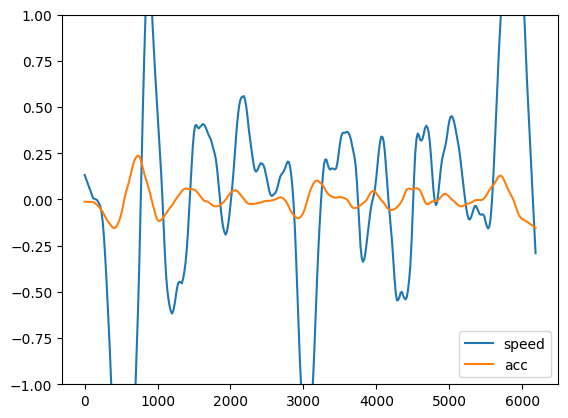

In [38]:
# plot arm_flex_l_speed and arm_flex_l_acc

sample = mot_df2

plt.plot(sample['time'], sample['elbow_flex_l_speed'], label='speed')
plt.plot(sample['time'], sample['elbow_flex_l_acc'], label='acc')
plt.legend()
plt.ylim(-1,1)
plt.show()


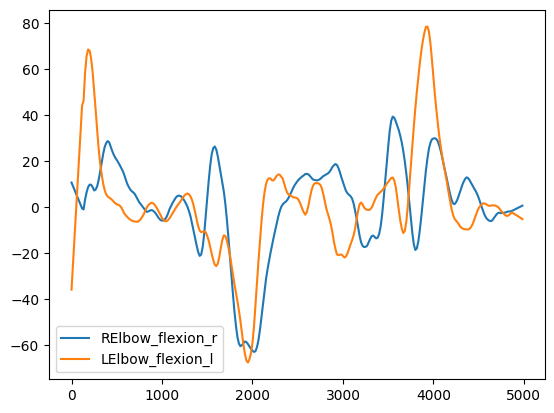

In [49]:
# plot elbow flexion l

plt.plot(mot_df2['time'], mot_df2['elbow_flex_r_speed'], label='RElbow_flexion_r')
plt.plot(mot_df2['time'], mot_df2['elbow_flex_l_speed'], label='LElbow_flexion_l')

plt.legend()
plt.show()

### ID&MT check

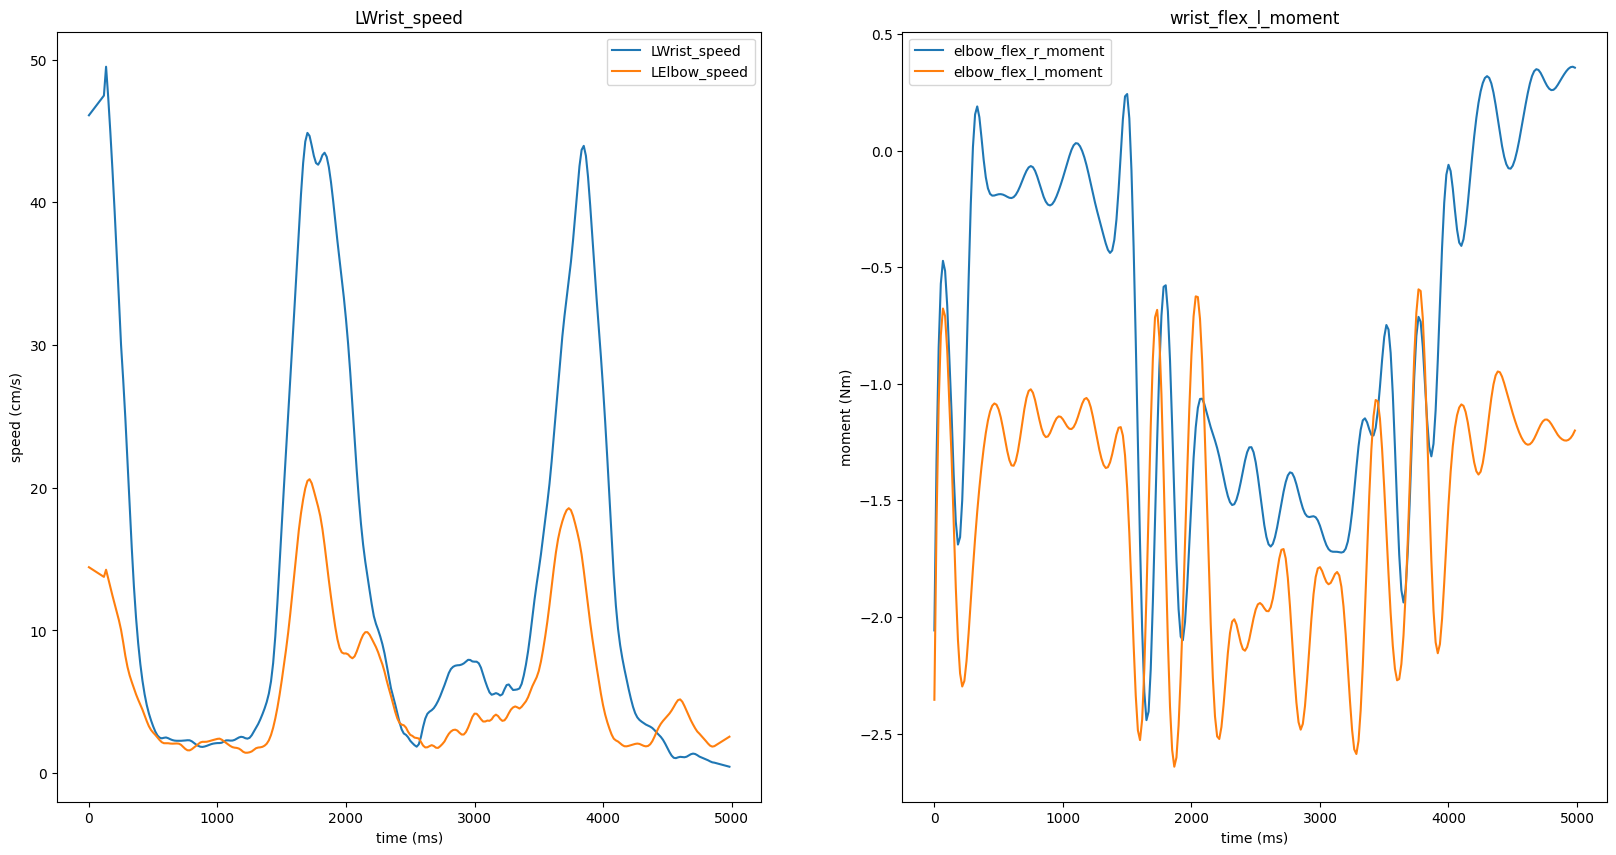

In [29]:
import matplotlib.pyplot as plt

# load in one id and mt file with the same trialid

idfiles = glob.glob(MTfolder_processed + '/id*.csv')
mtfiles = glob.glob(MTfolder_processed + '/mt*.csv')

id = pd.read_csv(idfiles[0])
mt = pd.read_csv(mtfiles[0])

# plot
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

ax[0].plot(mt['Time'], mt['LWrist_speed'], label='LWrist_speed')
# add LElbow_speed
ax[0].plot(mt['Time'], mt['LElbow_speed'], label='LElbow_speed')
ax[0].set_title('LWrist_speed')
ax[0].set_ylabel('speed (cm/s)')
ax[0].set_xlabel('time (ms)')
ax[0].legend()

# elbow flexion
ax[1].plot(id['time'], id['elbow_flex_r_moment'], label='elbow_flex_r_moment')
ax[1].plot(id['time'], id['elbow_flex_l_moment'], label='elbow_flex_l_moment')
ax[1].set_title('wrist_flex_l_moment')
ax[1].set_ylabel('moment (Nm)')
ax[1].set_xlabel('time (ms)')
ax[1].legend()

plt.show()

# Peak detection - work in progress, not needed here

In [64]:
from scipy.signal import find_peaks
from scipy.signal import peak_widths

# find peaks in the speed
peakcols = [x for x in samplecopy.columns if 'speed' in x]

for col in peakcols:
    # find peaks
    peaks, _ = find_peaks(samplecopy[col], height=15)
    # add peaks to the dataframe
    samplecopy[col + '_peak'] = 0
    samplecopy.loc[peaks, col + '_peak'] = 1
    # find widths

    widths_7 = peak_widths(samplecopy[col], peaks, rel_height=0.7)
    widths_5 = peak_widths(samplecopy[col], peaks, rel_height=0.5)
    widths_3 = peak_widths(samplecopy[col], peaks, rel_height=0.3)
    widths_1 = peak_widths(samplecopy[col], peaks, rel_height=1)
    break
    # add widths to the dataframe
    samplecopy[col + '_width'] = widths[0]


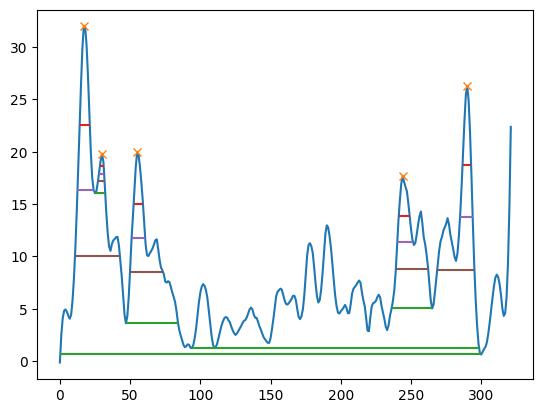

In [65]:
import matplotlib.pyplot as plt

x = samplecopy[col]

plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.hlines(*widths_1[1:], color="C2")
plt.hlines(*widths_3[1:], color="C3")
plt.hlines(*widths_5[1:], color="C4")
plt.hlines(*widths_7[1:], color="C5")
plt.show()

# Acoustics

### Packages

In [8]:
# data wrangle
import glob
import numpy as np
import pandas as pd

# audio processing
from scipy.signal import hilbert
from scipy.interpolate import interp1d
import librosa
import parselmouth

# plotting
import matplotlib.pyplot as plt
import IPython.display as ipd

### Folders

In [9]:
actotrack = glob.glob(ACfolder + "/*.wav", recursive=True)
print(actotrack)

# get rid of the first file because it's faulty
actotrack = actotrack[1:]

['E:\\charade_experiment_WORKSPACE\\xdf_procedure\\data\\Data_processed\\Data_trials\\Audio_48\\0_1_pr_1_Mic_nominal_srate48000_p0_dansen_geluiden_corrected.wav', 'E:\\charade_experiment_WORKSPACE\\xdf_procedure\\data\\Data_processed\\Data_trials\\Audio_48\\0_1_pr_10_Mic_nominal_srate48000_p1_auto_geluiden_corrected.wav', 'E:\\charade_experiment_WORKSPACE\\xdf_procedure\\data\\Data_processed\\Data_trials\\Audio_48\\0_1_pr_18_Mic_nominal_srate48000_p0_snel_combinatie_corrected.wav', 'E:\\charade_experiment_WORKSPACE\\xdf_procedure\\data\\Data_processed\\Data_trials\\Audio_48\\0_1_trial_2_Mic_nominal_srate48000_p0_bitter_geluiden_corrected.wav', 'E:\\charade_experiment_WORKSPACE\\xdf_procedure\\data\\Data_processed\\Data_trials\\Audio_48\\0_1_trial_8_Mic_nominal_srate48000_p0_walgen_geluiden_corrected.wav', 'E:\\charade_experiment_WORKSPACE\\xdf_procedure\\data\\Data_processed\\Data_trials\\Audio_48\\0_1_pr_9_Mic_nominal_srate48000_p1_langzaam_geluiden_corrected.wav', 'E:\\charade_experi

##  Audio check

In [10]:
# audio sample
sample = actotrack[0]

ipd.Audio(sample)

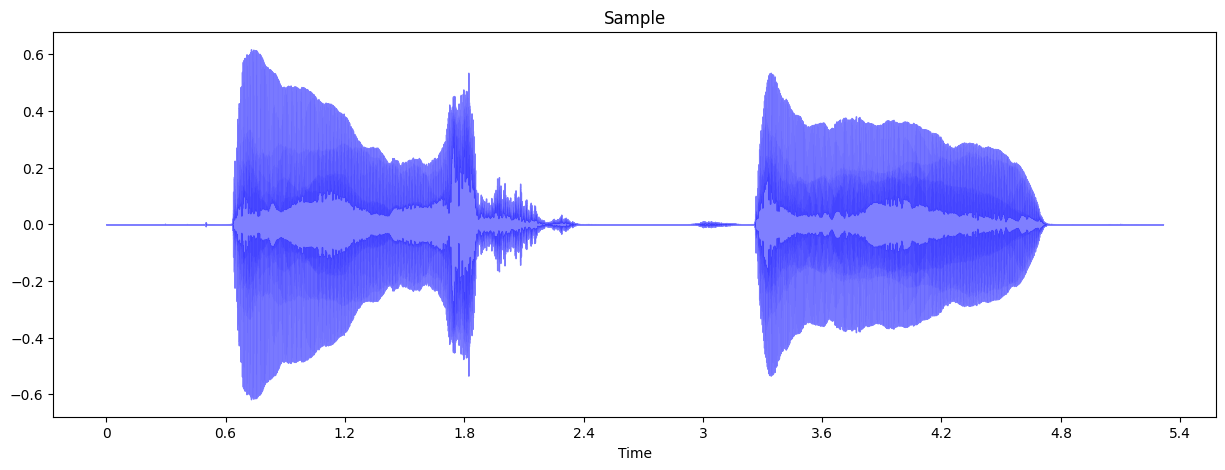

In [11]:
# visualize the waveform
# from https://www.youtube.com/watch?v=rlypsap6Wow

samp, sr = librosa.load(actotrack[0])

plt.figure(figsize=(15, 17))
plt.subplot(3, 1, 1)
librosa.display.waveshow(samp, color='blue', alpha=0.5)   
plt.title('Sample')
plt.show()


## Amplitude envelope (vocalic energy)

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
import librosa
import librosa.display

# Define the bandpass filter
def butter_bandpass(lowcut, highcut, fs, order=2):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filtfilt(data, lowcut, highcut, fs, order=2):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# Define the lowpass filter
def butter_lowpass(cutoff, fs, order=2):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low')
    return b, a

def butter_lowpass_filtfilt(data, cutoff, fs, order=2):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# Function to extract amplitude envelope
def amp_envelope(audiofilename):
    # load audio with librosa
    audio, sr = librosa.load(audiofilename, sr=None, mono=True)
    # Bandpass filter 400-4000Hz
    data = butter_bandpass_filtfilt(audio, 400, 4000, sr, order=2)
    # Lowpass filter 10Hz
    data = butter_lowpass_filtfilt(np.abs(data), 10, sr, order=2)
    # scale from 0 to 1
    data = (data - np.min(data)) / (np.max(data) - np.min(data))
    return data, sr


### Amplitude envelope check

E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_1_pr_10_Mic_nominal_srate48000_p1_auto_geluiden_corrected.wav
255093
255093


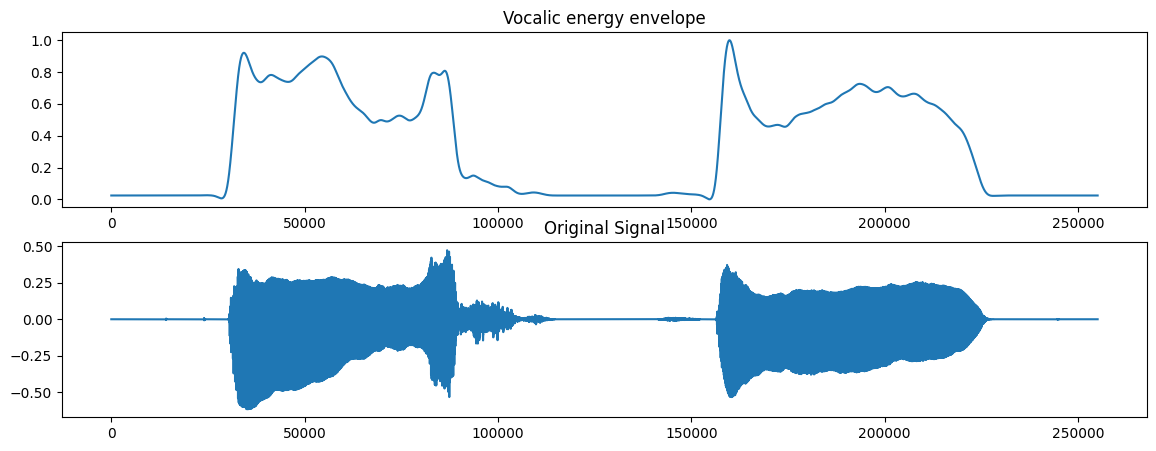

In [13]:
# Get the amplitude envelope
audiofilename = actotrack[0]
print(audiofilename)
ampv, sr = amp_envelope(audiofilename)
# Plot the filtered signal and the original signal
plt.figure(figsize=(14, 5))
plt.subplot(2, 1, 1)
plt.plot(ampv)
plt.title('Vocalic energy envelope')

# Extract and plot the original signal
rawaudio, sr = librosa.load(audiofilename, sr=None)
plt.subplot(2, 1, 2)
plt.plot(rawaudio)
plt.title('Original Signal')
plt.show()

In [14]:
actotrack = glob.glob(ACfolder + "*/*.wav", recursive=True)

# get rid of the first file - faulty
actotrack = actotrack[1:]
print(actotrack)

# Loop over wav files
for audiofile in actotrack:

    print('working on ' + audiofile)

    # get the trialid
    trialid = audiofile.split('\\')[-1].split('.')[0]
    trialid = '_'.join(trialid.split('_')[0:1] + trialid.split('_')[1:2] + trialid.split('_')[3:4] + trialid.split('_')[7:8])

    # apply the function
    ampv, sr = amp_envelope(audiofile)

    # Extract and plot the original signal
    rawaudio, sr = librosa.load(audiofile, sr=None)

    # create a time vector
    time_env = np.arange(0, len(rawaudio)/sr, 1/sr)
    
    # Ensure the lengths match by padding ampv if necessary - quick fix
    if len(ampv) < len(time_env):
        ampv = np.pad(ampv, (0, len(time_env) - len(ampv)), mode='constant')
    elif len(ampv) > len(time_env):
        ampv = ampv[:len(time_env)]

    # the same for rawaudio
    if len(rawaudio) < len(time_env):
        rawaudio = np.pad(rawaudio, (0, len(time_env) - len(rawaudio)), mode='constant')
    elif len(rawaudio) > len(time_env):
        rawaudio = rawaudio[:len(time_env)]
    
    # save the audio and envelope
    try:
        audio = pd.DataFrame({'time': time_env, 'audio': rawaudio, 'envelope': ampv, 'trialID': trialid})
        # convert time to ms
        audio['time'] = audio['time'] * 1000
        # write as csv
        audio.to_csv(ACfolder_processed + '/env_' + trialid + '.csv', index=False)
    except ValueError:
        print('ValueError: ' + trialid)
        continue


    

['E:\\charade_experiment_WORKSPACE\\xdf_procedure\\data\\Data_processed\\Data_trials\\Audio_48\\0_1_pr_10_Mic_nominal_srate48000_p1_auto_geluiden_corrected.wav', 'E:\\charade_experiment_WORKSPACE\\xdf_procedure\\data\\Data_processed\\Data_trials\\Audio_48\\0_1_pr_18_Mic_nominal_srate48000_p0_snel_combinatie_corrected.wav', 'E:\\charade_experiment_WORKSPACE\\xdf_procedure\\data\\Data_processed\\Data_trials\\Audio_48\\0_1_trial_2_Mic_nominal_srate48000_p0_bitter_geluiden_corrected.wav', 'E:\\charade_experiment_WORKSPACE\\xdf_procedure\\data\\Data_processed\\Data_trials\\Audio_48\\0_1_trial_8_Mic_nominal_srate48000_p0_walgen_geluiden_corrected.wav', 'E:\\charade_experiment_WORKSPACE\\xdf_procedure\\data\\Data_processed\\Data_trials\\Audio_48\\0_1_pr_9_Mic_nominal_srate48000_p1_langzaam_geluiden_corrected.wav', 'E:\\charade_experiment_WORKSPACE\\xdf_procedure\\data\\Data_processed\\Data_trials\\Audio_48\\0_1_pr_0_Mic_nominal_srate48000_p0_bloem_geluiden.wav', 'E:\\charade_experiment_WORKSP

## Pitch 

In [48]:
import numpy as np
import parselmouth

def extract_f0(locationsound, gender):
    # read the sound file into Python
    snd = parselmouth.Sound(locationsound)

    if gender == 'f':
        f0min = 75      ##TODO: set ranges from Praat script
        f0max = 600
    else:
        f0min = 75
        f0max = 600

    pitch = snd.to_pitch(pitch_floor=f0min, pitch_ceiling=f0max)

    f0_values = pitch.selected_array['frequency']

    return snd, f0_values

In [49]:

freq=48000    

meta = pd.read_csv('E:\charade_experiment_WORKSPACE\\xdf_procedure\data\\raw_data\META.txt', sep='\t')

# Loop over wav files
for audiofile in actotrack:
    print('working on ' + audiofile)


    # get the trialid
    trialid = audiofile.split('\\')[-1].split('.')[0]
    #trial id is the first, second, fourth and eighth element
    trialid = '_'.join(trialid.split('_')[0:1] + trialid.split('_')[1:2] + trialid.split('_')[3:4] + trialid.split('_')[7:8])

    print(trialid)

    # first element is sessionid, fourth element is participantid
    sessionid = trialid.split('_')[0]
    participantid = trialid.split('_')[3]
    ID = sessionid + '_' + participantid

    # what sex has this ID in meta
    sex = meta[meta['ID'] == ID]['sex'].values[0]

    # apply the function
    snd, f0 = extract_f0(audiofile, gender=sex)

    length = len(f0)

    # replace 0 values with NaN
    f0 = np.where(f0 == 0, np.nan, f0)

    # create time vector
    F0_time = np.linspace(0, snd.duration, len(f0)) * 1000  # Generate time vector

    # create df
    f0_df = pd.DataFrame({'time_ms': F0_time, 'f0': f0, 'ID': trialid})

    #### smoothing
    # parse into chunks of non-NaN values
    # create a new column for storing chunk number
    f0_df['chunk'] = None

    chunk = 0
    for index, row in f0_df.iterrows():
        if np.isnan(row['f0']):
            continue
        else:
            f0_df.loc[index, 'chunk'] = chunk
            # if the next value is NaN or this is the last row, increase the chunk
            if index == len(f0_df)-1:
                continue
            elif np.isnan(f0_df.loc[index+1, 'f0']):
                chunk += 1

    # now we can smooth the f0 values in each chunk
    chunks = f0_df['chunk'].unique()

    # skip if chunks are empty (that means that there is no f0 trace)
    if len(chunks) > 1:
        # ignore the first chunk (None)
        chunks = chunks[1:]
        for chunk in chunks:
            # get the rows of the chunk
            chunkrows = f0_df[f0_df['chunk'] == chunk]
            # dont smooth chunks shorter than 5
            if len(chunkrows) < 5:
                continue
            else:
                # smooth f0 with savgol 5, 3
                chunkrows['f0'] = scipy.signal.savgol_filter(chunkrows['f0'], 5, 3) 
                # put it back to the samplef0
                f0_df.loc[f0_df['chunk'] == chunk, 'f0'] = chunkrows['f0']

    # get rid of the chunk column
    f0_df = f0_df.drop('chunk', axis=1)
    # write as csv
    f0_df.to_csv(ACfolder_processed + '/f0_' + trialid + '.csv', index=False)



<>:3: SyntaxWarning: invalid escape sequence '\c'
<>:3: SyntaxWarning: invalid escape sequence '\c'
C:\Users\kadava\AppData\Local\Temp\ipykernel_11468\3716440565.py:3: SyntaxWarning: invalid escape sequence '\c'
  meta = pd.read_csv('E:\charade_experiment_WORKSPACE\\xdf_procedure\data\\raw_data\META.txt', sep='\t')
C:\Users\kadava\AppData\Local\Temp\ipykernel_11468\3716440565.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = scipy.signal.savgol_filter(chunkrows['f0'], 5, 3)
C:\Users\kadava\AppData\Local\Temp\ipykernel_11468\3716440565.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_1_pr_10_Mic_nominal_srate48000_p1_auto_geluiden_corrected.wav
0_1_10_p1
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_1_pr_18_Mic_nominal_srate48000_p0_snel_combinatie_corrected.wav
0_1_18_p0
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_1_trial_2_Mic_nominal_srate48000_p0_bitter_geluiden_corrected.wav
0_1_2_p0
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_1_trial_8_Mic_nominal_srate48000_p0_walgen_geluiden_corrected.wav
0_1_8_p0
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_1_pr_9_Mic_nominal_srate48000_p1_langzaam_geluiden_corrected.wav
0_1_9_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_11468\3716440565.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = scipy.signal.savgol_filter(chunkrows['f0'], 5, 3)
C:\Users\kadava\AppData\Local\Temp\ipykernel_11468\3716440565.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = scipy.signal.savgol_filter(chunkrows['f0'], 5, 3)
C:\Users\kadava\AppData\Local\Temp\ipykernel_11468\3716440565.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_1_pr_0_Mic_nominal_srate48000_p0_bloem_geluiden.wav
0_1_0_p0
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_1_trial_3_Mic_nominal_srate48000_p0_vechten_geluiden.wav
0_1_3_p0
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_1_trial_4_Mic_nominal_srate48000_p0_ademen_geluiden.wav
0_1_4_p0
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_1_trial_5_Mic_nominal_srate48000_p0_bijten_geluiden.wav
0_1_5_p0
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_1_trial_6_Mic_nominal_srate48000_p0_zoemen_geluiden.wav
0_1_6_p0


C:\Users\kadava\AppData\Local\Temp\ipykernel_11468\3716440565.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = scipy.signal.savgol_filter(chunkrows['f0'], 5, 3)
C:\Users\kadava\AppData\Local\Temp\ipykernel_11468\3716440565.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = scipy.signal.savgol_filter(chunkrows['f0'], 5, 3)
C:\Users\kadava\AppData\Local\Temp\ipykernel_11468\3716440565.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_1_trial_7_Mic_nominal_srate48000_p0_fluisteren_geluiden.wav
0_1_7_p0
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_1_trial_11_Mic_nominal_srate48000_p1_eten_geluiden.wav
0_1_11_p1
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_1_trial_12_Mic_nominal_srate48000_p1_ei_geluiden.wav
0_1_12_p1
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_1_trial_13_Mic_nominal_srate48000_p1_zwemmen_geluiden.wav
0_1_13_p1
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_1_trial_14_Mic_nominal_srate48000_p1_snel_geluiden.wav
0_1_14_p1
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_1_trial_15_Mic_nominal_srate48000_p1_regen_geluiden.wav
0_1_15_p1
work

C:\Users\kadava\AppData\Local\Temp\ipykernel_11468\3716440565.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = scipy.signal.savgol_filter(chunkrows['f0'], 5, 3)
C:\Users\kadava\AppData\Local\Temp\ipykernel_11468\3716440565.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = scipy.signal.savgol_filter(chunkrows['f0'], 5, 3)
C:\Users\kadava\AppData\Local\Temp\ipykernel_11468\3716440565.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_1_trial_17_Mic_nominal_srate48000_p1_luidruchtig_geluiden.wav
0_1_17_p1
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_1_pr_19_Mic_nominal_srate48000_p0_olifant_combinatie.wav
0_1_19_p0
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_1_trial_20_Mic_nominal_srate48000_p0_verdrietig_combinatie.wav
0_1_20_p0
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_1_trial_21_Mic_nominal_srate48000_p0_koud_combinatie.wav
0_1_21_p0
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_1_trial_22_Mic_nominal_srate48000_p0_staan_combinatie.wav
0_1_22_p0
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_1_trial_23_Mic_nominal_srate48000_p0_stil_combinatie.

C:\Users\kadava\AppData\Local\Temp\ipykernel_11468\3716440565.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = scipy.signal.savgol_filter(chunkrows['f0'], 5, 3)
C:\Users\kadava\AppData\Local\Temp\ipykernel_11468\3716440565.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = scipy.signal.savgol_filter(chunkrows['f0'], 5, 3)
C:\Users\kadava\AppData\Local\Temp\ipykernel_11468\3716440565.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_1_trial_25_Mic_nominal_srate48000_p0_bang_combinatie.wav
0_1_25_p0
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_1_trial_26_Mic_nominal_srate48000_p0_gooien_combinatie.wav
0_1_26_p0
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_1_pr_27_Mic_nominal_srate48000_p1_haasten_combinatie.wav
0_1_27_p1
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_1_pr_28_Mic_nominal_srate48000_p1_gek_combinatie.wav
0_1_28_p1
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_1_trial_29_Mic_nominal_srate48000_p1_rennen_combinatie.wav
0_1_29_p1
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_1_trial_30_Mic_nominal_srate48000_p1_likken_combinatie.wav
0_1_30

C:\Users\kadava\AppData\Local\Temp\ipykernel_11468\3716440565.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = scipy.signal.savgol_filter(chunkrows['f0'], 5, 3)
C:\Users\kadava\AppData\Local\Temp\ipykernel_11468\3716440565.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = scipy.signal.savgol_filter(chunkrows['f0'], 5, 3)
C:\Users\kadava\AppData\Local\Temp\ipykernel_11468\3716440565.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_1_trial_32_Mic_nominal_srate48000_p1_onweer_combinatie.wav
0_1_32_p1
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_1_trial_33_Mic_nominal_srate48000_p1_man_combinatie.wav
0_1_33_p1
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_1_trial_34_Mic_nominal_srate48000_p1_springen_combinatie.wav
0_1_34_p1
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_1_trial_35_Mic_nominal_srate48000_p1_langzaam_combinatie.wav
0_1_35_p1
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_1_pr_36_Mic_nominal_srate48000_p0_snijden_gebaren.wav
0_1_36_p0
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_1_pr_37_Mic_nominal_srate48000_p0_comfortabel_gebaren.wav
0

C:\Users\kadava\AppData\Local\Temp\ipykernel_11468\3716440565.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = scipy.signal.savgol_filter(chunkrows['f0'], 5, 3)
C:\Users\kadava\AppData\Local\Temp\ipykernel_11468\3716440565.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = scipy.signal.savgol_filter(chunkrows['f0'], 5, 3)
C:\Users\kadava\AppData\Local\Temp\ipykernel_11468\3716440565.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_1_trial_42_Mic_nominal_srate48000_p0_drinken_gebaren.wav
0_1_42_p0
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_1_trial_43_Mic_nominal_srate48000_p0_sterk_gebaren.wav
0_1_43_p0
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_1_trial_44_Mic_nominal_srate48000_p0_oud_gebaren.wav
0_1_44_p0
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_1_pr_45_Mic_nominal_srate48000_p1_koken_gebaren.wav
0_1_45_p1
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_1_pr_46_Mic_nominal_srate48000_p1_slang_gebaren.wav
0_1_46_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_11468\3716440565.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = scipy.signal.savgol_filter(chunkrows['f0'], 5, 3)
C:\Users\kadava\AppData\Local\Temp\ipykernel_11468\3716440565.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = scipy.signal.savgol_filter(chunkrows['f0'], 5, 3)
C:\Users\kadava\AppData\Local\Temp\ipykernel_11468\3716440565.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_1_trial_47_Mic_nominal_srate48000_p1_slang_gebaren.wav
0_1_47_p1
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_1_trial_48_Mic_nominal_srate48000_p1_zuur_gebaren.wav
0_1_48_p1
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_1_trial_49_Mic_nominal_srate48000_p1_niet_gebaren.wav
0_1_49_p1
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_1_trial_50_Mic_nominal_srate48000_p1_weten_gebaren.wav
0_1_50_p1
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_1_trial_51_Mic_nominal_srate48000_p1_slaan_gebaren.wav
0_1_51_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_11468\3716440565.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = scipy.signal.savgol_filter(chunkrows['f0'], 5, 3)
C:\Users\kadava\AppData\Local\Temp\ipykernel_11468\3716440565.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = scipy.signal.savgol_filter(chunkrows['f0'], 5, 3)
C:\Users\kadava\AppData\Local\Temp\ipykernel_11468\3716440565.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_1_trial_52_Mic_nominal_srate48000_p1_hond_gebaren.wav
0_1_52_p1
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_1_trial_53_Mic_nominal_srate48000_p1_vangen_gebaren.wav
0_1_53_p1
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_pr_0_Mic_nominal_srate48000_p0_juichen_combinatie_c0.wav
0_2_0_p0
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_pr_1_Mic_nominal_srate48000_p0_zingen_combinatie_c0.wav
0_2_1_p0
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_trial_2_Mic_nominal_srate48000_p0_vrouw_combinatie_c0.wav
0_2_2_p0
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_trial_3_Mic_nominal_srate48000_p0_vrouw_combinatie_c1.wav
0_2_3_

C:\Users\kadava\AppData\Local\Temp\ipykernel_11468\3716440565.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = scipy.signal.savgol_filter(chunkrows['f0'], 5, 3)
C:\Users\kadava\AppData\Local\Temp\ipykernel_11468\3716440565.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = scipy.signal.savgol_filter(chunkrows['f0'], 5, 3)
C:\Users\kadava\AppData\Local\Temp\ipykernel_11468\3716440565.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_trial_4_Mic_nominal_srate48000_p0_vrouw_combinatie_c2.wav
0_2_4_p0
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_trial_5_Mic_nominal_srate48000_p0_verbranden_combinatie_c0.wav
0_2_5_p0
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_trial_6_Mic_nominal_srate48000_p0_verbranden_combinatie_c1.wav
0_2_6_p0
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_trial_7_Mic_nominal_srate48000_p0_verbranden_combinatie_c2.wav
0_2_7_p0
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_trial_8_Mic_nominal_srate48000_p0_ik_combinatie_c0.wav
0_2_8_p0
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_trial_9_Mic_nominal_srate48000_p0_kauwen_

C:\Users\kadava\AppData\Local\Temp\ipykernel_11468\3716440565.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = scipy.signal.savgol_filter(chunkrows['f0'], 5, 3)
C:\Users\kadava\AppData\Local\Temp\ipykernel_11468\3716440565.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = scipy.signal.savgol_filter(chunkrows['f0'], 5, 3)
C:\Users\kadava\AppData\Local\Temp\ipykernel_11468\3716440565.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_trial_15_Mic_nominal_srate48000_p0_misschien_combinatie_c2.wav
0_2_15_p0
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_trial_16_Mic_nominal_srate48000_p0_bliksem_combinatie_c0.wav
0_2_16_p0
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_trial_17_Mic_nominal_srate48000_p0_bliksem_combinatie_c1.wav
0_2_17_p0
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_trial_18_Mic_nominal_srate48000_p0_bliksem_combinatie_c2.wav
0_2_18_p0
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_pr_19_Mic_nominal_srate48000_p1_glimlach_combinatie_c0.wav
0_2_19_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_11468\3716440565.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = scipy.signal.savgol_filter(chunkrows['f0'], 5, 3)
C:\Users\kadava\AppData\Local\Temp\ipykernel_11468\3716440565.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = scipy.signal.savgol_filter(chunkrows['f0'], 5, 3)
C:\Users\kadava\AppData\Local\Temp\ipykernel_11468\3716440565.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_pr_20_Mic_nominal_srate48000_p1_glimlach_combinatie_c1.wav
0_2_20_p1
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_pr_21_Mic_nominal_srate48000_p1_glimlach_combinatie_c2.wav
0_2_21_p1
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_pr_22_Mic_nominal_srate48000_p1_klok_combinatie_c0.wav
0_2_22_p1
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_trial_23_Mic_nominal_srate48000_p1_groot_combinatie_c0.wav
0_2_23_p1
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_trial_24_Mic_nominal_srate48000_p1_groot_combinatie_c1.wav
0_2_24_p1
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_trial_25_Mic_nominal_srate48000_p1_groot_combin

C:\Users\kadava\AppData\Local\Temp\ipykernel_11468\3716440565.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = scipy.signal.savgol_filter(chunkrows['f0'], 5, 3)
C:\Users\kadava\AppData\Local\Temp\ipykernel_11468\3716440565.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = scipy.signal.savgol_filter(chunkrows['f0'], 5, 3)
C:\Users\kadava\AppData\Local\Temp\ipykernel_11468\3716440565.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_trial_27_Mic_nominal_srate48000_p1_hoog_combinatie_c1.wav
0_2_27_p1
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_trial_28_Mic_nominal_srate48000_p1_hoog_combinatie_c2.wav
0_2_28_p1
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_trial_29_Mic_nominal_srate48000_p1_blij_combinatie_c0.wav
0_2_29_p1
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_trial_30_Mic_nominal_srate48000_p1_blij_combinatie_c1.wav
0_2_30_p1
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_trial_31_Mic_nominal_srate48000_p1_blij_combinatie_c2.wav
0_2_31_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_11468\3716440565.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = scipy.signal.savgol_filter(chunkrows['f0'], 5, 3)
C:\Users\kadava\AppData\Local\Temp\ipykernel_11468\3716440565.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = scipy.signal.savgol_filter(chunkrows['f0'], 5, 3)
C:\Users\kadava\AppData\Local\Temp\ipykernel_11468\3716440565.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_trial_32_Mic_nominal_srate48000_p1_vis_combinatie_c0.wav
0_2_32_p1
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_trial_33_Mic_nominal_srate48000_p1_ruiken_combinatie_c0.wav
0_2_33_p1
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_trial_34_Mic_nominal_srate48000_p1_wind_combinatie_c0.wav
0_2_34_p1
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_trial_35_Mic_nominal_srate48000_p1_heet_combinatie_c0.wav
0_2_35_p1
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_trial_36_Mic_nominal_srate48000_p1_heet_combinatie_c1.wav
0_2_36_p1
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_trial_37_Mic_nominal_srate48000_p1_heet_combina

C:\Users\kadava\AppData\Local\Temp\ipykernel_11468\3716440565.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = scipy.signal.savgol_filter(chunkrows['f0'], 5, 3)
C:\Users\kadava\AppData\Local\Temp\ipykernel_11468\3716440565.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = scipy.signal.savgol_filter(chunkrows['f0'], 5, 3)
C:\Users\kadava\AppData\Local\Temp\ipykernel_11468\3716440565.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_pr_39_Mic_nominal_srate48000_p0_vliegtuig_gebaren_c0.wav
0_2_39_p0
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_pr_40_Mic_nominal_srate48000_p0_vliegtuig_gebaren_c1.wav
0_2_40_p0
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_trial_41_Mic_nominal_srate48000_p0_vogel_gebaren_c0.wav
0_2_41_p0
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_trial_42_Mic_nominal_srate48000_p0_kruipen_gebaren_c0.wav
0_2_42_p0
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_trial_43_Mic_nominal_srate48000_p0_water_gebaren_c0.wav
0_2_43_p0


C:\Users\kadava\AppData\Local\Temp\ipykernel_11468\3716440565.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = scipy.signal.savgol_filter(chunkrows['f0'], 5, 3)
C:\Users\kadava\AppData\Local\Temp\ipykernel_11468\3716440565.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = scipy.signal.savgol_filter(chunkrows['f0'], 5, 3)
C:\Users\kadava\AppData\Local\Temp\ipykernel_11468\3716440565.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_trial_44_Mic_nominal_srate48000_p0_water_gebaren_c1.wav
0_2_44_p0
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_trial_45_Mic_nominal_srate48000_p0_water_gebaren_c2.wav
0_2_45_p0
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_trial_46_Mic_nominal_srate48000_p0_vuur_gebaren_c0.wav
0_2_46_p0
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_trial_47_Mic_nominal_srate48000_p0_goed_gebaren_c0.wav
0_2_47_p0
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_trial_48_Mic_nominal_srate48000_p0_goed_gebaren_c1.wav
0_2_48_p0


C:\Users\kadava\AppData\Local\Temp\ipykernel_11468\3716440565.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = scipy.signal.savgol_filter(chunkrows['f0'], 5, 3)
C:\Users\kadava\AppData\Local\Temp\ipykernel_11468\3716440565.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = scipy.signal.savgol_filter(chunkrows['f0'], 5, 3)
C:\Users\kadava\AppData\Local\Temp\ipykernel_11468\3716440565.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_trial_49_Mic_nominal_srate48000_p0_horen_gebaren_c0.wav
0_2_49_p0
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_trial_50_Mic_nominal_srate48000_p0_ver_gebaren_c0.wav
0_2_50_p0
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_trial_51_Mic_nominal_srate48000_p0_ver_gebaren_c1.wav
0_2_51_p0
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_trial_52_Mic_nominal_srate48000_p0_ver_gebaren_c2.wav
0_2_52_p0
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_pr_53_Mic_nominal_srate48000_p1_geheim_gebaren_c0.wav
0_2_53_p1
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_pr_54_Mic_nominal_srate48000_p1_geheim_gebaren_c1.wav
0_2_54_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_11468\3716440565.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = scipy.signal.savgol_filter(chunkrows['f0'], 5, 3)
C:\Users\kadava\AppData\Local\Temp\ipykernel_11468\3716440565.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = scipy.signal.savgol_filter(chunkrows['f0'], 5, 3)
C:\Users\kadava\AppData\Local\Temp\ipykernel_11468\3716440565.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_pr_55_Mic_nominal_srate48000_p1_geheim_gebaren_c2.wav
0_2_55_p1
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_pr_56_Mic_nominal_srate48000_p1_telefoon_gebaren_c0.wav
0_2_56_p1
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_trial_57_Mic_nominal_srate48000_p1_blazen_gebaren_c0.wav
0_2_57_p1
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_trial_58_Mic_nominal_srate48000_p1_geven_gebaren_c0.wav
0_2_58_p1
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_trial_59_Mic_nominal_srate48000_p1_geven_gebaren_c1.wav
0_2_59_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_11468\3716440565.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = scipy.signal.savgol_filter(chunkrows['f0'], 5, 3)
C:\Users\kadava\AppData\Local\Temp\ipykernel_11468\3716440565.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = scipy.signal.savgol_filter(chunkrows['f0'], 5, 3)
C:\Users\kadava\AppData\Local\Temp\ipykernel_11468\3716440565.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_trial_60_Mic_nominal_srate48000_p1_kat_gebaren_c0.wav
0_2_60_p1
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_trial_61_Mic_nominal_srate48000_p1_lachen_gebaren_c0.wav
0_2_61_p1
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_trial_62_Mic_nominal_srate48000_p1_zoet_gebaren_c0.wav
0_2_62_p1
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_trial_63_Mic_nominal_srate48000_p1_zoet_gebaren_c1.wav
0_2_63_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_11468\3716440565.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = scipy.signal.savgol_filter(chunkrows['f0'], 5, 3)
C:\Users\kadava\AppData\Local\Temp\ipykernel_11468\3716440565.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = scipy.signal.savgol_filter(chunkrows['f0'], 5, 3)
C:\Users\kadava\AppData\Local\Temp\ipykernel_11468\3716440565.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_trial_64_Mic_nominal_srate48000_p1_zoet_gebaren_c2.wav
0_2_64_p1
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_trial_65_Mic_nominal_srate48000_p1_slapen_gebaren_c0.wav
0_2_65_p1
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_trial_66_Mic_nominal_srate48000_p1_berg_gebaren_c0.wav
0_2_66_p1
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_pr_67_Mic_nominal_srate48000_p0_ziek_geluiden_c0.wav
0_2_67_p0
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_pr_68_Mic_nominal_srate48000_p0_ziek_geluiden_c1.wav
0_2_68_p0
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_pr_69_Mic_nominal_srate48000_p0_ziek_geluiden_c2.wav
0_2_69_p0


C:\Users\kadava\AppData\Local\Temp\ipykernel_11468\3716440565.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = scipy.signal.savgol_filter(chunkrows['f0'], 5, 3)
C:\Users\kadava\AppData\Local\Temp\ipykernel_11468\3716440565.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = scipy.signal.savgol_filter(chunkrows['f0'], 5, 3)
C:\Users\kadava\AppData\Local\Temp\ipykernel_11468\3716440565.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_pr_70_Mic_nominal_srate48000_p0_zwaaien_geluiden_c0.wav
0_2_70_p0
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_pr_71_Mic_nominal_srate48000_p0_zwaaien_geluiden_c1.wav
0_2_71_p0
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_pr_72_Mic_nominal_srate48000_p0_zwaaien_geluiden_c2.wav
0_2_72_p0
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_trial_73_Mic_nominal_srate48000_p0_geur_geluiden_c0.wav
0_2_73_p0
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_trial_74_Mic_nominal_srate48000_p0_geur_geluiden_c1.wav
0_2_74_p0
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_trial_75_Mic_nominal_srate48000_p0_geur_geluiden_c2.wav
0_

C:\Users\kadava\AppData\Local\Temp\ipykernel_11468\3716440565.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = scipy.signal.savgol_filter(chunkrows['f0'], 5, 3)
C:\Users\kadava\AppData\Local\Temp\ipykernel_11468\3716440565.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = scipy.signal.savgol_filter(chunkrows['f0'], 5, 3)
C:\Users\kadava\AppData\Local\Temp\ipykernel_11468\3716440565.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_trial_76_Mic_nominal_srate48000_p0_vlieg_geluiden_c0.wav
0_2_76_p0
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_trial_77_Mic_nominal_srate48000_p0_vlieg_geluiden_c1.wav
0_2_77_p0
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_trial_78_Mic_nominal_srate48000_p0_vlieg_geluiden_c2.wav
0_2_78_p0
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_trial_79_Mic_nominal_srate48000_p0_scherp_geluiden_c0.wav
0_2_79_p0
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_trial_80_Mic_nominal_srate48000_p0_scherp_geluiden_c1.wav
0_2_80_p0
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_trial_81_Mic_nominal_srate48000_p0_scherp_geluiden_

C:\Users\kadava\AppData\Local\Temp\ipykernel_11468\3716440565.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = scipy.signal.savgol_filter(chunkrows['f0'], 5, 3)
C:\Users\kadava\AppData\Local\Temp\ipykernel_11468\3716440565.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = scipy.signal.savgol_filter(chunkrows['f0'], 5, 3)
C:\Users\kadava\AppData\Local\Temp\ipykernel_11468\3716440565.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_trial_83_Mic_nominal_srate48000_p0_staart_geluiden_c1.wav
0_2_83_p0
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_trial_84_Mic_nominal_srate48000_p0_staart_geluiden_c2.wav
0_2_84_p0
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_trial_85_Mic_nominal_srate48000_p0_vallen_geluiden_c0.wav
0_2_85_p0
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_trial_86_Mic_nominal_srate48000_p0_piepen_geluiden_c0.wav
0_2_86_p0
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_trial_87_Mic_nominal_srate48000_p0_piepen_geluiden_c1.wav
0_2_87_p0


C:\Users\kadava\AppData\Local\Temp\ipykernel_11468\3716440565.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = scipy.signal.savgol_filter(chunkrows['f0'], 5, 3)
C:\Users\kadava\AppData\Local\Temp\ipykernel_11468\3716440565.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = scipy.signal.savgol_filter(chunkrows['f0'], 5, 3)
C:\Users\kadava\AppData\Local\Temp\ipykernel_11468\3716440565.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_trial_88_Mic_nominal_srate48000_p0_piepen_geluiden_c2.wav
0_2_88_p0
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_trial_89_Mic_nominal_srate48000_p0_jagen_geluiden_c0.wav
0_2_89_p0
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_trial_90_Mic_nominal_srate48000_p0_jagen_geluiden_c1.wav
0_2_90_p0
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_trial_91_Mic_nominal_srate48000_p0_jagen_geluiden_c2.wav
0_2_91_p0
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_pr_92_Mic_nominal_srate48000_p1_bal_geluiden_c0.wav
0_2_92_p1
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_pr_93_Mic_nominal_srate48000_p1_bal_geluiden_c1.wav
0_2_9

C:\Users\kadava\AppData\Local\Temp\ipykernel_11468\3716440565.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = scipy.signal.savgol_filter(chunkrows['f0'], 5, 3)
C:\Users\kadava\AppData\Local\Temp\ipykernel_11468\3716440565.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = scipy.signal.savgol_filter(chunkrows['f0'], 5, 3)
C:\Users\kadava\AppData\Local\Temp\ipykernel_11468\3716440565.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_pr_94_Mic_nominal_srate48000_p1_bal_geluiden_c2.wav
0_2_94_p1
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_pr_95_Mic_nominal_srate48000_p1_sneeuw_geluiden_c0.wav
0_2_95_p1
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_pr_96_Mic_nominal_srate48000_p1_sneeuw_geluiden_c1.wav
0_2_96_p1
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_pr_97_Mic_nominal_srate48000_p1_sneeuw_geluiden_c2.wav
0_2_97_p1
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_trial_98_Mic_nominal_srate48000_p1_zwaar_geluiden_c0.wav
0_2_98_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_11468\3716440565.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = scipy.signal.savgol_filter(chunkrows['f0'], 5, 3)
C:\Users\kadava\AppData\Local\Temp\ipykernel_11468\3716440565.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = scipy.signal.savgol_filter(chunkrows['f0'], 5, 3)
C:\Users\kadava\AppData\Local\Temp\ipykernel_11468\3716440565.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_trial_99_Mic_nominal_srate48000_p1_zwaar_geluiden_c1.wav
0_2_99_p1
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_trial_100_Mic_nominal_srate48000_p1_zwaar_geluiden_c2.wav
0_2_100_p1
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_trial_101_Mic_nominal_srate48000_p1_grommen_geluiden_c0.wav
0_2_101_p1
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_trial_102_Mic_nominal_srate48000_p1_zout_geluiden_c0.wav
0_2_102_p1
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_trial_103_Mic_nominal_srate48000_p1_zout_geluiden_c1.wav
0_2_103_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_11468\3716440565.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = scipy.signal.savgol_filter(chunkrows['f0'], 5, 3)
C:\Users\kadava\AppData\Local\Temp\ipykernel_11468\3716440565.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = scipy.signal.savgol_filter(chunkrows['f0'], 5, 3)
C:\Users\kadava\AppData\Local\Temp\ipykernel_11468\3716440565.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_trial_104_Mic_nominal_srate48000_p1_zout_geluiden_c2.wav
0_2_104_p1
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_trial_105_Mic_nominal_srate48000_p1_zuigen_geluiden_c0.wav
0_2_105_p1
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_trial_106_Mic_nominal_srate48000_p1_zuigen_geluiden_c1.wav
0_2_106_p1
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_trial_107_Mic_nominal_srate48000_p1_zuigen_geluiden_c2.wav
0_2_107_p1
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_trial_108_Mic_nominal_srate48000_p1_dik_geluiden_c0.wav
0_2_108_p1
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_2_trial_109_Mic_nominal_srate48000_p1_dik_gel

C:\Users\kadava\AppData\Local\Temp\ipykernel_11468\3716440565.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = scipy.signal.savgol_filter(chunkrows['f0'], 5, 3)
C:\Users\kadava\AppData\Local\Temp\ipykernel_11468\3716440565.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = scipy.signal.savgol_filter(chunkrows['f0'], 5, 3)
C:\Users\kadava\AppData\Local\Temp\ipykernel_11468\3716440565.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

### Pitch check

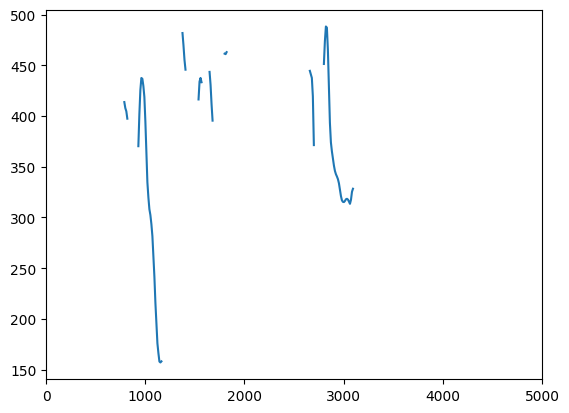

In [50]:
# plot to check
plt.plot(f0_df['time_ms'], f0_df['f0'])
plt.xlim(0, 5000)
plt.show()

## Some additional features (eg., spectogram)

In [51]:
def extract_sound_features(locationsound):
    # read the sound file into Python
    snd = parselmouth.Sound(locationsound)

    intensity = snd.to_intensity()
    spectogram = snd.to_spectrogram()
    pitch = snd.to_pitch()

    return snd, intensity, spectogram, pitch

def draw_spectrogram(spectrogram, dynamic_range=70):
    X, Y = spectrogram.x_grid(), spectrogram.y_grid()
    sg_db = 10 * np.log10(spectrogram.values)
    plt.pcolormesh(X, Y, sg_db, vmin=sg_db.max() - dynamic_range, cmap='afmhot')
    plt.ylim([spectrogram.ymin, spectrogram.ymax])
    plt.xlabel("time [s]")
    plt.ylabel("frequency [Hz]")
    
def draw_intensity(intensity):
    plt.plot(intensity.xs(), intensity.values.T, linewidth=3, color='w')
    plt.plot(intensity.xs(), intensity.values.T, linewidth=1)
    plt.grid(False)
    plt.ylim(0)
    plt.ylabel("intensity [dB]")


def draw_pitch(pitch):
    # Extract selected pitch contour, and
    # replace unvoiced samples by NaN to not plot
    pitch_values = pitch.selected_array['frequency']
    pitch_values[pitch_values==0] = np.nan
    plt.plot(pitch.xs(), pitch_values, 'o', markersize=5, color='blue')
    plt.plot(pitch.xs(), pitch_values, 'o', markersize=2)
    plt.grid(False)
    plt.ylim(0, pitch.ceiling)
    plt.ylabel("fundamental frequency [Hz]")

In [53]:
# loop over the audio files and extract the features
# create an empty list to store the results
features_list = []

# Loop over wav files
for audiofile in actotrack:
    print('working on ' + audiofile)
    # get the trialid
    trialid = audiofile.split('\\')[-1].split('.')[0]
    #trial id is the first, second, fourth and eighth element
    trialid = '_'.join(trialid.split('_')[0:1] + trialid.split('_')[1:2] + trialid.split('_')[3:4] + trialid.split('_')[7:8])
    # apply the function
    snd, intensity, spectogram, pitch = extract_sound_features(audiofile)

    # create df
    features = pd.DataFrame({'intensity': [intensity], 'spectogram': [spectogram], 'pitch': [pitch], 'ID': trialid})

    # store the df in the list with filename
    features_list.append(features)

# combine all dfs in the list to one df
features_combined = pd.concat(features_list, ignore_index=True)

working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_1_pr_10_Mic_nominal_srate48000_p1_auto_geluiden_corrected.wav
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_1_pr_18_Mic_nominal_srate48000_p0_snel_combinatie_corrected.wav
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_1_trial_2_Mic_nominal_srate48000_p0_bitter_geluiden_corrected.wav
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_1_trial_8_Mic_nominal_srate48000_p0_walgen_geluiden_corrected.wav
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_1_pr_9_Mic_nominal_srate48000_p1_langzaam_geluiden_corrected.wav
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_1_pr_0_Mic_nominal_srate48000_p0_bloem_geluiden.wav
working on E:\charade_exp

C:\Users\kadava\AppData\Local\Temp\ipykernel_11468\1322877882.py:3: RuntimeWarning: divide by zero encountered in log10
  sg_db = 10 * np.log10(spectrogram.values)


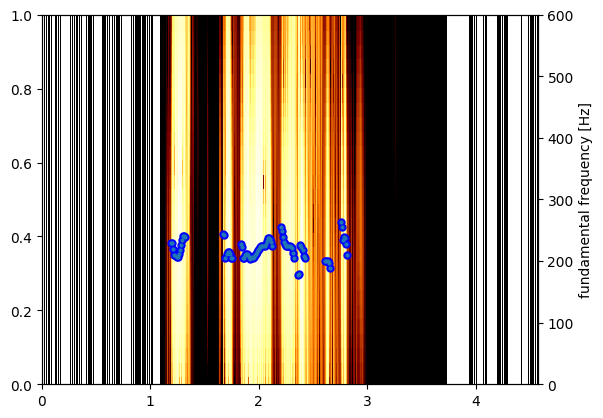

In [60]:
# pick random row as sample
sample_feat = features_list[5]

plt.figure()
plt.twinx()
draw_spectrogram(sample_feat['spectogram'][0])
draw_pitch(sample_feat['pitch'][0])
#draw_intensity(intensity)
plt.xlim([snd.xmin, snd.xmax])
plt.show()


# Balance Board



### Folders

In [61]:
# in BBfolder, find all files containing BalanceBoard

BB_files = glob.glob(BBfolder + '*BalanceBoard*.csv', recursive=True)
print(BB_files)


['E:\\charade_experiment_WORKSPACE\\xdf_procedure\\data\\Data_processed\\Data_trials\\0_1_pr_1_BalanceBoard_stream_nominal_srate500_p0_dansen_geluiden_corrected.csv', 'E:\\charade_experiment_WORKSPACE\\xdf_procedure\\data\\Data_processed\\Data_trials\\0_1_pr_10_BalanceBoard_stream_nominal_srate500_p1_auto_geluiden_corrected.csv', 'E:\\charade_experiment_WORKSPACE\\xdf_procedure\\data\\Data_processed\\Data_trials\\0_1_pr_18_BalanceBoard_stream_nominal_srate500_p0_snel_combinatie_corrected.csv', 'E:\\charade_experiment_WORKSPACE\\xdf_procedure\\data\\Data_processed\\Data_trials\\0_1_trial_2_BalanceBoard_stream_nominal_srate500_p0_bitter_geluiden_corrected.csv', 'E:\\charade_experiment_WORKSPACE\\xdf_procedure\\data\\Data_processed\\Data_trials\\0_1_trial_8_BalanceBoard_stream_nominal_srate500_p0_walgen_geluiden_corrected.csv', 'E:\\charade_experiment_WORKSPACE\\xdf_procedure\\data\\Data_processed\\Data_trials\\0_1_pr_9_BalanceBoard_stream_nominal_srate500_p1_langzaam_geluiden_corrected.c

### COP

In [71]:
for bb in BB_files:
    print('working on ' + bb)
    # get trialid
    trialid = bb.split('\\')[-1].split('.')[0]
    # get the first, second, fourth, nineth elements
    trialid = '_'.join(trialid.split('_')[:2] + trialid.split('_')[3:4] + trialid.split('_')[8:9])

    # because we are going to merge on bb, we will store also more information
    fileinfo = bb.split('\\')[-1].split('.')[0]

    # if second element is 1, we will store last three elements
    if fileinfo.split('_')[1] == '1':
        # if there is not 'corrected' in the name, we will store last three elements
        if 'corrected' not in fileinfo:
            info = '_'.join(fileinfo.split('_')[-3:])
        else:
            info = '_'.join(fileinfo.split('_')[-4:])
    elif fileinfo.split('_')[1] == '2':
        # otherwise we store last four elements (5 when corrected)
        if 'corrected' not in fileinfo:
            info = '_'.join(fileinfo.split('_')[-4:])
        else:
            info = '_'.join(fileinfo.split('_')[-5:])

    # Load the balanceboard data
    df_bb = pd.read_csv(bb)

    # Rename columns
    df_bb.columns = ['time_s', 'left_back', 'right_forward', 'right_back', 'left_forward']

    # Calculate sampling rate
    bbsamp = 1 / np.mean(np.diff(df_bb['time_s'] - min(df_bb['time_s'])))

    # Apply Savitzky-Golay filter to smooth the data
    for col in df_bb.columns[1:]:
        df_bb[col] = scipy.signal.savgol_filter(df_bb[col], 51, 5)

    # Calculate COPX and COPY
    COPX = (df_bb['right_forward'] + df_bb['right_back']) - (df_bb['left_forward'] + df_bb['left_back'])
    COPY = (df_bb['right_forward'] + df_bb['left_forward']) - (df_bb['left_back'] + df_bb['right_back'])

    # Calculate COPXc and COPYc
    df_bb['COPXc'] = scipy.signal.savgol_filter(np.insert(np.diff(COPX), 0, 0), 51, 5)
    df_bb['COPYc'] = scipy.signal.savgol_filter(np.insert(np.diff(COPY), 0, 0), 51, 5)

    # Calculate COPc
    df_bb['COPc'] = np.sqrt(df_bb['COPXc']**2 + df_bb['COPYc']**2)

    # restart the time so that starts from 0
    df_bb['time_s'] = df_bb['time_s'] - min(df_bb['time_s'])
    # convert to ms
    df_bb['time_s'] = df_bb['time_s']*1000

    # rename time_s to time
    df_bb.rename(columns={'time_s': 'time'}, inplace=True)

    # Add trialid
    df_bb['TrialID'] = trialid
    # Add info
    df_bb['FileInfo'] = info

    # Write as csv to MTfolder_processed
    df_bb.to_csv(MTfolder_processed + '/bb_' + trialid + '.csv', index=False)


working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\0_1_pr_1_BalanceBoard_stream_nominal_srate500_p0_dansen_geluiden_corrected.csv
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\0_1_pr_10_BalanceBoard_stream_nominal_srate500_p1_auto_geluiden_corrected.csv
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\0_1_pr_18_BalanceBoard_stream_nominal_srate500_p0_snel_combinatie_corrected.csv
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\0_1_trial_2_BalanceBoard_stream_nominal_srate500_p0_bitter_geluiden_corrected.csv
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\0_1_trial_8_BalanceBoard_stream_nominal_srate500_p0_walgen_geluiden_corrected.csv
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\0_1_pr_9_BalanceBoard_stream_nominal_srate500_p1_langzaam_geluide

## Plot to check

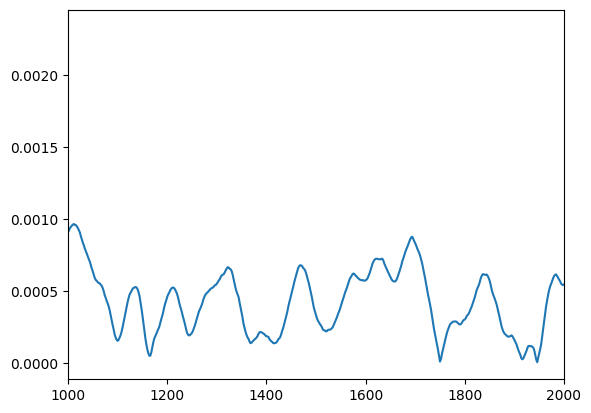

In [72]:
import matplotlib.pyplot as plt

bbfiles = glob.glob(MTfolder_processed + '/bb*.csv')

samplebb = pd.read_csv(bbfiles[20])

# plot COPc the sample
plt.plot(samplebb['time'], samplebb['COPc'])
plt.xlim(1000,2000)
plt.show()


# Merging all

In [5]:
import glob
import scipy
import pandas as pd



# prepare all files
bbfiles = glob.glob(MTfolder_processed + '/bb*.csv')
idfiles = glob.glob(MTfolder_processed + '/id*.csv')
ikfiles = glob.glob(MTfolder_processed + '/ik*.csv')
mtfiles = glob.glob(MTfolder_processed + '/mt*.csv')
mtfiles = [x for x in mtfiles if 'centered' not in x]
envfiles = glob.glob(ACfolder_processed + '/env*.csv')
f0files = glob.glob(ACfolder_processed + '/f0*.csv')

desired_sr = 0.5    # this is the sr we are going to merge on (in Hz/sec)


for file in bbfiles:
    print('working on ' + file)
    bb_df = pd.read_csv(file)
    # get trial id
    trialid = bb_df['TrialID'][0]
    # find the same trialid in idfiles
    id_file = [x for x in idfiles if trialid in x]
    try:
        id_df = pd.read_csv(id_file[0])
    except IndexError:
        print('IndexError: ' + trialid + 'not found')
        continue
    
    # find the same trialid in mtfiles
    mt_file = [x for x in mtfiles if trialid in x]
    try:
        mt_df = pd.read_csv(mt_file[0])
    except IndexError:
        print('IndexError: ' + trialid + 'not found')
        continue
    # rename Time to time
    mt_df.rename(columns={'Time': 'time'}, inplace=True)

    # find the same trialid in envfiles
    env_file = [x for x in envfiles if trialid in x]
    try:
        env_df = pd.read_csv(env_file[0])
    except IndexError:
        print('IndexError: ' + trialid + 'not found')
        continue
    # rename trialID to TrialID
    env_df.rename(columns={'trialID': 'TrialID'}, inplace=True)

    # find the same trialid in f0files
    f0_file = [x for x in f0files if trialid in x]
    try:
        f0_df = pd.read_csv(f0_file[0])
    except IndexError:
        print('IndexError: ' + trialid + 'not found')
        continue

    # find the same trialid in ikfiles
    ik_file = [x for x in ikfiles if trialid in x]
    try:
        ik_df = pd.read_csv(ik_file[0])
    except IndexError:
        print('IndexError: ' + trialid + 'not found')
        continue

    # rename time_ms to time
    f0_df.rename(columns={'time_ms': 'time'}, inplace=True)
    # rename ID to TrialID
    f0_df.rename(columns={'ID': 'TrialID'}, inplace=True)

    #### regularize sr in bb
    time_new = np.arange(0, max(bb_df['time']), 1/desired_sr)
    bb_interp = pd.DataFrame({'time': time_new})
    
    # interpolate all columns in samplebb except of the first and last
    colstoint = bb_df.columns
    # get rid of time and trialid
    colstoint = [x for x in colstoint if 'time' not in x]
    colstoint = [x for x in colstoint if 'TrialID' not in x]
    colstoint = [x for x in colstoint if 'FileInfo' not in x]

    for col in colstoint:
        bb_interp[col] = bb_df[col].interpolate(method='linear', x = bb_interp['time'])

    # add trialid and time
    bb_interp['TrialID'] = trialid
    bb_interp['FileInfo'] = bb_df['FileInfo'][0]
    
    ##### merge the bb_interp with env
    # merge the two dataframes
    merge1 = pd.merge(bb_interp, env_df, on=['time', 'TrialID'], how='outer')

    # interpolate missing values of envelope and audio
    colstoint = merge1.columns
    colstoint = [x for x in colstoint if 'audio' in x or 'envelope' in x]

    for col in colstoint: 
        merge1[col] = merge1[col].interpolate(method='linear', x = merge1['time'])

    # now we can kick out all vlaues where COPc is NaN
    merge1 = merge1[~np.isnan(merge1['COPc'])]

    #### merge with ID
    # merge the two dataframes
    merge2 = pd.merge(merge1, id_df, on=['time', 'TrialID'], how='outer')

    # get cols of sampleid
    colstoint = id_df.columns
    colstoint = [x for x in colstoint if 'time' not in x]
    colstoint = [x for x in colstoint if 'TrialID' not in x]

    # interpolate 
    for col in colstoint:
        merge2[col] = merge2[col].interpolate(method='linear', x = merge2['time'])

    # now we can kick out all values where COPc is NaN to get sampling rate back to 500	
    merge2 = merge2[~np.isnan(merge2['COPc'])]

    #### merge with MT
    # merge the two dataframes
    merge3 = pd.merge(merge2, mt_df, on=['time', 'TrialID'], how='outer')

    # get cols of samplemt
    colstoint = mt_df.columns
    colstoint = [x for x in colstoint if 'time' not in x]
    colstoint = [x for x in colstoint if 'TrialID' not in x]

    # interpolate missing values of from mt
    for col in colstoint:
        # interpolate
        merge3[col] = merge3[col].interpolate(method='linear', x = merge3['time'])

    # now we can kick out all values where COPc is NaN
    merge3 = merge3[~np.isnan(merge3['COPc'])]

    #### merge with F0
    # for interpolation, we need to again parse f0 into chunks of non-NaN values
    f0_df['chunk'] = None

    # annotate chunks of non-NaN values
    chunk = 0
    for index, row in f0_df.iterrows():
        if np.isnan(row['f0']):
            continue
        else:
            f0_df.loc[index, 'chunk'] = chunk
            # if the next value is NaN or this is the last row, increase the chunk
            if index == len(f0_df)-1:
                continue
            elif np.isnan(f0_df.loc[index+1, 'f0']):
                chunk += 1

    chunks = f0_df['chunk'].unique()

    # skip if chunks are empty (that means that there is no f0 trace)
    if len(chunks) > 1:
        # ignore the first chunk (None)
        chunks = chunks[1:]

    #now we can merge
    merge4 = pd.merge(merge3, f0_df, on=['time', 'TrialID'], how='outer')

    # we ignore the None chunk above, so if there is some trace, None should not be within chunks
    if None not in chunks:
        for chunk in chunks:
            # get the first and last row of the chunk
            firstrow = merge4[merge4['chunk'] == chunk].index[0]
            lastrow = merge4[merge4['chunk'] == chunk].index[-1]
            # fill all inbetween with the chunk number
            merge4.loc[firstrow:lastrow, 'chunk'] = chunk
            # get the rows of the chunk
            chunkrows = merge4[merge4['chunk'] == chunk]
            # interpolate
            chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
            # put the interpolated chunk back to the merge4
            merge4.loc[merge4['chunk'] == chunk, 'f0'] = chunkrows['f0']

    # get rid of the chunk column
    merge4.drop('chunk', axis=1, inplace=True)

    # now we can drop all rows where COPc is NaN
    merge4 = merge4[~np.isnan(merge4['COPc'])]

    ### merge with IK
    merge5 = pd.merge(merge4, ik_df, on=['time', 'TrialID'], how='outer')

    # get cols of sampleik
    colstoint = ik_df.columns
    colstoint = [x for x in colstoint if 'time' not in x]
    colstoint = [x for x in colstoint if 'TrialID' not in x]

    # interpolate missing values of from ik
    for col in colstoint:
        # interpolate
        merge5[col] = merge5[col].interpolate(method='linear', x = merge5['time'])

    # now we can kick out all values where COPc is NaN
    merge5 = merge5[~np.isnan(merge5['COPc'])]

    merge_final = merge5

    # write to csv
    merge_final.to_csv(TSmerged + '/merged_' + trialid + '.csv', index=False)    

working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_1_1_p0.csv
IndexError: 0_1_1_p0not found
working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_1_10_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is tryin

working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_1_18_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is tryin

working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_1_2_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_1_8_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_1_9_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is tryin

working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_111_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is tryin

working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_112_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is tryin

working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_1_0_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is tryin

working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_1_3_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is tryin

working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_1_4_p0.csv
working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_1_5_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is tryin

working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_1_6_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_1_7_p0.csv
working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_1_11_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_1_12_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is tryin

working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_1_13_p1.csv
working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_1_14_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_1_15_p1.csv
working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_1_16_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is tryin

working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_1_17_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_1_19_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is tryin

working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_1_20_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_1_21_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_1_22_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is tryin

working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_1_23_p0.csv
working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_1_24_p0.csv
working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_1_25_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_1_26_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_1_27_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is tryin

working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_1_28_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_1_29_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_1_30_p1.csv
working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_1_31_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is tryin

working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_1_32_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_1_33_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is tryin

working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_1_34_p1.csv
IndexError: 0_1_34_p1not found
working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_1_35_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is tryin

working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_1_36_p0.csv
working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_1_37_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is tryin

working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_1_38_p0.csv
working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_1_39_p0.csv
working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_1_40_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_1_41_p0.csv
working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_1_42_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is tryin

working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_1_43_p0.csv
working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_1_44_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is tryin

working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_1_45_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is tryin

working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_1_46_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is tryin

working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_1_47_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is tryin

working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_1_48_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_1_49_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is tryin

working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_1_50_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is tryin

working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_1_51_p1.csv
working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_1_52_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is tryin

working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_1_53_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is tryin

working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_0_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_1_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_2_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_3_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_4_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_5_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_6_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_7_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_8_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is tryin

working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_9_p0.csv
working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_10_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_11_p0.csv
working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_12_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is tryin

working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_13_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_14_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is tryin

working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_15_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_16_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_17_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_18_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is tryin

working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_19_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_20_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_21_p1.csv
working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_22_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is tryin

working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_23_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_24_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_25_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_26_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_27_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_28_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_29_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is tryin

working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_30_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_31_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is tryin

working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_32_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is tryin

working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_33_p1.csv
working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_34_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is tryin

working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_35_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_36_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_37_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is tryin

working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_38_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is tryin

working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_39_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is tryin

working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_40_p0.csv
working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_41_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is tryin

working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_42_p0.csv
IndexError: 0_2_42_p0not found
working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_43_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is tryin

working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_44_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is tryin

working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_45_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is tryin

working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_46_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is tryin

working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_47_p0.csv
working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_48_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is tryin

working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_49_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_50_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is tryin

working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_51_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is tryin

working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_52_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is tryin

working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_53_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is tryin

working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_54_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is tryin

working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_55_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is tryin

working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_56_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is tryin

working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_57_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is tryin

working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_58_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is tryin

working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_59_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is tryin

working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_60_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is tryin

working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_61_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is tryin

working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_62_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is tryin

working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_63_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is tryin

working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_64_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is tryin

working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_65_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is tryin

working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_66_p1.csv
IndexError: 0_2_66_p1not found
working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_67_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is tryin

working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_68_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is tryin

working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_69_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is tryin

working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_70_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_71_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_72_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is tryin

working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_73_p0.csv
working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_74_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_75_p0.csv
working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_76_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_77_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_78_p0.csv
working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_79_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is tryin

working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_80_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_81_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_82_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_83_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is tryin

working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_84_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_85_p0.csv
working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_86_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is tryin

working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_87_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_88_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is tryin

working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_89_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is tryin

working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_90_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_91_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_92_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_93_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is tryin

working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_94_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is tryin

working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_95_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is tryin

working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_96_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_97_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is tryin

working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_98_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is tryin

working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_99_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is tryin

working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_100_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_101_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is tryin

working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_102_p1.csv
working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_103_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is tryin

working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_104_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_105_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_106_p1.csv
working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_107_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_108_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is tryin

working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_109_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_110_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is tryin

working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_113_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkrows['f0'] = chunkrows['f0'].interpolate(method='linear', x = chunkrows['time'])
C:\Users\kadava\AppData\Local\Temp\ipykernel_14956\710538232.py:176: SettingWithCopyWarning: 
A value is tryin

In [6]:
merge_final

time  left_back  right_forward  right_back  left_forward     COPXc  \
0        0.0   1.121945       0.812051    1.480789      1.403169 -0.000252   
1        2.0   1.122196       0.812064    1.480782      1.403227 -0.000150   
2        4.0   1.122379       0.812091    1.480792      1.403254 -0.000064   
3        6.0   1.122505       0.812128    1.480816      1.403257  0.000007   
4        8.0   1.122583       0.812174    1.480855      1.403241  0.000065   
...      ...        ...            ...         ...           ...       ...   
2462  4560.0   1.116847       0.824376    1.546575      1.353726 -0.000165   
2463  4562.0   1.116522       0.823931    1.546296      1.353412 -0.000110   
2464  4564.0   1.116126       0.823423    1.546061      1.353080 -0.000028   
2465  4566.0   1.115654       0.822845    1.545893      1.352729  0.000085   
2466  4568.0   1.115103       0.822189    1.545817      1.352358  0.000235   

         COPYc      COPc     TrialID               FileInfo  ...  \
0    -0.000123  0.000280  0_2_113_p1  p1_huilen_geluiden_c0  ...   
1    -0.000100  0.000180  0_2_113_p1  p1_huilen_geluiden_c0  ...   
2    -0.000083  0.000105  0_2_113_p1  p1_huilen_geluiden_c0  ...   
3    -0.000072  0.000072  0_2_113_p1  p1_huilen_geluiden_c0  ...   
4    -0.000065  0.000092  0_2_113_p1  p1_huilen_geluiden_c0  ...   
...        ...       ...         ...                    ...  ...   
2462 -0.000121  0.000204  0_2_113_p1  p1_huilen_geluiden_c0  ...   
2463 -0.000150  0.000186  0_2_113_p1  p1_huilen_geluiden_c0  ...   
2464 -0.000204  0.000206  0_2_113_p1  p1_huilen_geluiden_c0  ...   
2465 -0.000287  0.000299  0_2_113_p1  p1_huilen_geluiden_c0  ...   
2466 -0.000401  0.000465  0_2_113_p1  p1_huilen_geluiden_c0  ...   

      pro_sup_r_acc  wrist_flex_r_acc  wrist_dev_r_acc  arm_flex_l_acc  \
0     -5.467848e-16               0.0              0.0       -0.035286   
1     -5.455072e-16               0.0              0.0       -0.035085   
2     -5.442296e-16               0.0              0.0       -0.034884   
3     -5.429519e-16               0.0              0.0       -0.034683   
4     -5.416743e-16               0.0              0.0       -0.034482   
...             ...               ...              ...             ...   
2462  -1.865175e-15               0.0              0.0        0.120050   
2463  -1.865175e-15               0.0              0.0        0.120050   
2464  -1.865175e-15               0.0              0.0        0.120050   
2465  -1.865175e-15               0.0              0.0        0.120050   
2466  -1.865175e-15               0.0              0.0        0.120050   

      arm_add_l_acc  arm_rot_l_acc  elbow_flex_l_acc  pro_sup_l_acc  \
0         -0.003284       0.003645          0.001758  -5.467848e-16   
1         -0.003412       0.004088          0.001712  -5.455072e-16   
2         -0.003539       0.004530          0.001665  -5.442296e-16   
3         -0.003666       0.004973          0.001619  -5.429519e-16   
4         -0.003793       0.005416          0.001572  -5.416743e-16   
...             ...            ...               ...            ...   
2462      -0.028315       0.192580         -0.004705  -1.865175e-15   
2463      -0.028315       0.192580         -0.004705  -1.865175e-15   
2464      -0.028315       0.192580         -0.004705  -1.865175e-15   
2465      -0.028315       0.192580         -0.004705  -1.865175e-15   
2466      -0.028315       0.192580         -0.004705  -1.865175e-15   

      wrist_flex_l_acc  wrist_dev_l_acc  
0                  0.0              0.0  
1                  0.0              0.0  
2                  0.0              0.0  
3                  0.0              0.0  
4                  0.0              0.0  
...                ...              ...  
2462               0.0              0.0  
2463               0.0              0.0  
2464               0.0              0.0  
2465               0.0              0.0  
2466               0.0              0.0  

[2285 r

### Check merge

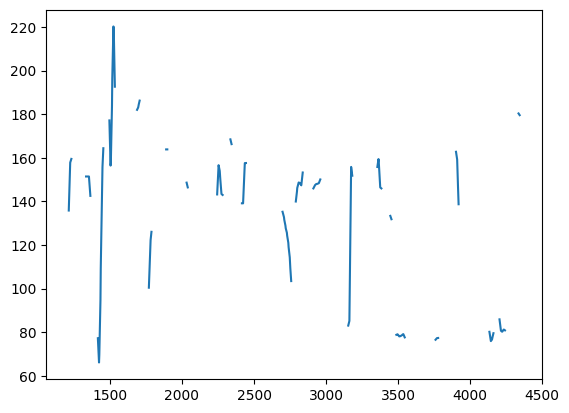

In [4]:
# mergedfiles
mergedfiles = glob.glob(TSmerged + '/merged*.csv')

# load random file
samplemerged = pd.read_csv(mergedfiles[42])
samplemerged['TrialID']

# plot to check
plt.plot(samplemerged['time'], samplemerged['f0'])
plt.show()


# Merge data with annotations from ELAN

In [8]:
annofolder = curfolder + '\MT_annotated\\'
annofiles = glob.glob(annofolder + '*ELAN_tiers.csv')
mergedfiles = glob.glob(TSmerged + '/merged*.csv')
mergedfiles = [x for x in mergedfiles if 'anno' not in x]


<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2094297232.py:1: SyntaxWarning: invalid escape sequence '\M'
  annofolder = curfolder + '\MT_annotated\\'


## Function to parse annotation from ELAN

In [4]:
## add to it also vocalization tier

import xml.etree.ElementTree as ET

def parse_eaf_file(eaf_file, rel_tiers):
    tree = ET.parse(eaf_file)
    root = tree.getroot()

    time_order = root.find('TIME_ORDER')
    time_slots = {time_slot.attrib['TIME_SLOT_ID']: time_slot.attrib['TIME_VALUE'] for time_slot in time_order}

    annotations = []
    relevant_tiers = {rel_tiers}
    for tier in root.findall('TIER'):
        tier_id = tier.attrib['TIER_ID']
        if tier_id in relevant_tiers:
            for annotation in tier.findall('ANNOTATION/ALIGNABLE_ANNOTATION'):
                # Ensure required attributes are present
                if 'TIME_SLOT_REF1' in annotation.attrib and 'TIME_SLOT_REF2' in annotation.attrib:
                    ts_ref1 = annotation.attrib['TIME_SLOT_REF1']
                    ts_ref2 = annotation.attrib['TIME_SLOT_REF2']
                    # Get annotation ID if it exists, otherwise set to None
                    ann_id = annotation.attrib.get('ANNOTATION_ID', None)
                    annotation_value = annotation.find('ANNOTATION_VALUE').text.strip()
                    annotations.append({
                        'tier_id': tier_id,
                        'annotation_id': ann_id,
                        'start_time': time_slots[ts_ref1],
                        'end_time': time_slots[ts_ref2],
                        'annotation_value': annotation_value
                    })

    return annotations


## Get vocalizations from ELAN

In [5]:
manualannofiles = glob.glob(curfolder + '/ManualAnno/R1/*ELAN_tiers.eaf') # Ola's

# txt file to write the annotations
vocal_anno = curfolder + '/ManualAnno/vocalization_annotations.txt'


with open(vocal_anno, 'w') as f:
    for file in manualannofiles:
        print('working on ' + file)
        # get the filename as the last element
        filename = file.split('\\')[-1]
        # replace _ELAN_tiers.eaf with ''
        filename = filename.replace('_ELAN_tiers.eaf', '')
        # parse the file
        annotations = parse_eaf_file(file, 'vocalization')
        # write the annotations
        for annotation in annotations:
            f.write(f"{annotation['start_time']}\t{annotation['end_time']}\t{annotation['annotation_value']}\t{filename}\n")



working on e:\FLESH_ContinuousBodilyEffort\TS_processing/ManualAnno/R1\0_1_11_p1_ELAN_tiers.eaf
working on e:\FLESH_ContinuousBodilyEffort\TS_processing/ManualAnno/R1\0_1_12_p1_ELAN_tiers.eaf
working on e:\FLESH_ContinuousBodilyEffort\TS_processing/ManualAnno/R1\0_1_13_p1_ELAN_tiers.eaf
working on e:\FLESH_ContinuousBodilyEffort\TS_processing/ManualAnno/R1\0_1_14_p1_ELAN_tiers.eaf
working on e:\FLESH_ContinuousBodilyEffort\TS_processing/ManualAnno/R1\0_1_15_p1_ELAN_tiers.eaf
working on e:\FLESH_ContinuousBodilyEffort\TS_processing/ManualAnno/R1\0_1_16_p1_ELAN_tiers.eaf
working on e:\FLESH_ContinuousBodilyEffort\TS_processing/ManualAnno/R1\0_1_17_p1_ELAN_tiers.eaf
working on e:\FLESH_ContinuousBodilyEffort\TS_processing/ManualAnno/R1\0_1_20_p0_ELAN_tiers.eaf
working on e:\FLESH_ContinuousBodilyEffort\TS_processing/ManualAnno/R1\0_1_21_p0_ELAN_tiers.eaf
working on e:\FLESH_ContinuousBodilyEffort\TS_processing/ManualAnno/R1\0_1_22_p0_ELAN_tiers.eaf
working on e:\FLESH_ContinuousBodilyEffo

In [9]:
voc_anno = curfolder + '\\ManualAnno\\vocalization_annotations.txt'

for file in mergedfiles:
    print('working on ' + file)

    # get trialid
    trialid = file.split('\\')[-1].split('.')[0]
    # replace merged_ with ''
    trialid = trialid.replace('merged_', '')
    
    # find in annofiles the one with the same trialid
    try:
        annofile = [x for x in annofiles if trialid in x][0]
    except IndexError:
        print('IndexError: ' + trialid + 'not found')
        continue

    # load the merged file
    merged = pd.read_csv(file)
    # load the annotation file
    anno = pd.read_csv(annofile)
    # rename Time to time
    anno.rename(columns={'Time': 'time'}, inplace=True)

    ### voc_ano
    voc_df = pd.read_csv(voc_anno, sep='\t', header=None)

    # get the annotations for the trialid
    voc_anno_trial = voc_df[voc_df[3] == trialid]

    if voc_anno_trial.empty:
        print('no vocalization annotations for ' + trialid)
    else:
        # create a new column for vocalization
        merged['vocalization'] = 0
        # get the start and end times
        for index, row in voc_anno_trial.iterrows():
            start = row[0]
            end = row[1]
            merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]

    # merge the two dataframes
    merged_anno = pd.merge(merged, anno, on=['time', 'TrialID'], how='outer')

    # interpolate missing values of anno columns
    colstoint = anno.columns
    colstoint = [x for x in colstoint if 'time' not in x]
    colstoint = [x for x in colstoint if 'TrialID' not in x]

    for col in colstoint:
        # fill in missing values
        merged_anno[col] = merged_anno[col].fillna(method='ffill')

    # get rid of missing values in COPc
    merged_anno = merged_anno[~np.isnan(merged_anno['COPc'])]

    # write to csv 
    merged_anno.to_csv(TSmerged + '/merged_anno_' + trialid + '.csv', index=False)


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_1_10_p1.csv
no vocalization annotations for 0_1_10_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_1_18_p0.csv
no vocalization annotations for 0_1_18_p0


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_1_2_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_1_8_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_1_9_p1.csv
no vocalization annotations for 0_1_9_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_111_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_112_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_1_0_p0.csv
no vocalization annotations for 0_1_0_p0


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_1_3_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_1_4_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_1_5_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'sounding' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_1_6_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_1_7_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_1_11_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_1_12_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_1_13_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_1_14_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_1_15_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_1_16_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_1_17_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_1_19_p0.csv
no vocalization annotations for 0_1_19_p0


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_1_20_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_1_21_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_1_22_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_1_23_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_1_24_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_1_25_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_1_26_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_1_27_p1.csv
no vocalization annotations for 0_1_27_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_1_28_p1.csv
no vocalization annotations for 0_1_28_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_1_29_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_1_30_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_1_31_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_1_32_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_1_33_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_1_35_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_1_36_p0.csv
no vocalization annotations for 0_1_36_p0


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_1_37_p0.csv
no vocalization annotations for 0_1_37_p0


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_1_38_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_1_39_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_1_40_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_1_41_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_1_42_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_1_43_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_1_44_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_1_45_p1.csv
no vocalization annotations for 0_1_45_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_1_46_p1.csv
no vocalization annotations for 0_1_46_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_1_47_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_1_48_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_1_49_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_1_50_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_1_51_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_1_52_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_1_53_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_0_p0.csv
no vocalization annotations for 0_2_0_p0


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_1_p0.csv
no vocalization annotations for 0_2_1_p0


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_2_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_3_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_4_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_5_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_6_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_7_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_8_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_9_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_10_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_11_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_12_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_13_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_14_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_15_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_16_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_17_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_18_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_19_p1.csv
no vocalization annotations for 0_2_19_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_20_p1.csv
no vocalization annotations for 0_2_20_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_21_p1.csv
no vocalization annotations for 0_2_21_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_22_p1.csv
no vocalization annotations for 0_2_22_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_23_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_24_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_25_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_26_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_27_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_28_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_29_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_30_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_31_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_32_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_33_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_34_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_35_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_36_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_37_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_38_p0.csv
no vocalization annotations for 0_2_38_p0


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_39_p0.csv
no vocalization annotations for 0_2_39_p0


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_40_p0.csv
no vocalization annotations for 0_2_40_p0


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_41_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_43_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_44_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_45_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_46_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_47_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_48_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_49_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_50_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_51_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_52_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_53_p1.csv
no vocalization annotations for 0_2_53_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_54_p1.csv
no vocalization annotations for 0_2_54_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_55_p1.csv
no vocalization annotations for 0_2_55_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_56_p1.csv
no vocalization annotations for 0_2_56_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_57_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_58_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_59_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_60_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_61_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_62_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_63_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_64_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_65_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_67_p0.csv
no vocalization annotations for 0_2_67_p0


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_68_p0.csv
no vocalization annotations for 0_2_68_p0


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_69_p0.csv
no vocalization annotations for 0_2_69_p0


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_70_p0.csv
no vocalization annotations for 0_2_70_p0


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_71_p0.csv
no vocalization annotations for 0_2_71_p0


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_72_p0.csv
no vocalization annotations for 0_2_72_p0


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_73_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_74_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_75_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_76_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_77_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_78_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_79_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_80_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_81_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_82_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_83_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_84_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_85_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_86_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_87_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_88_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_89_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_90_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_91_p0.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_92_p1.csv
no vocalization annotations for 0_2_92_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_93_p1.csv
no vocalization annotations for 0_2_93_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_94_p1.csv
no vocalization annotations for 0_2_94_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_95_p1.csv
no vocalization annotations for 0_2_95_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_96_p1.csv
no vocalization annotations for 0_2_96_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_97_p1.csv
no vocalization annotations for 0_2_97_p1


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_98_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_99_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_100_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_101_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_102_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_103_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_104_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_105_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_106_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_107_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_108_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_109_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_110_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


working on e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_merged\merged_0_2_113_p1.csv


C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'silent' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged.loc[(merged['time'] >= start) & (merged['time'] <= end), 'vocalization'] = row[2]
C:\Users\kadava\AppData\Local\Temp\ipykernel_13424\2801919562.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_anno[col] = merged_anno[col].fillna(method='ffill')


In [11]:
merged_anno

time  left_back  right_forward  right_back  left_forward     COPXc  \
0        0.0   1.121945       0.812051    1.480789      1.403169 -0.000252   
1        2.0   1.122196       0.812064    1.480782      1.403227 -0.000150   
2        4.0   1.122379       0.812091    1.480792      1.403254 -0.000064   
3        6.0   1.122505       0.812128    1.480816      1.403257  0.000007   
4        8.0   1.122583       0.812174    1.480855      1.403241  0.000065   
...      ...        ...            ...         ...           ...       ...   
2546  4560.0   1.116847       0.824376    1.546575      1.353726 -0.000165   
2547  4562.0   1.116522       0.823931    1.546296      1.353412 -0.000110   
2548  4564.0   1.116126       0.823423    1.546061      1.353080 -0.000028   
2549  4566.0   1.115654       0.822845    1.545893      1.352729  0.000085   
2550  4568.0   1.115103       0.822189    1.545817      1.352358  0.000235   

         COPYc      COPc     TrialID               FileInfo  ...  \
0    -0.000123  0.000280  0_2_113_p1  p1_huilen_geluiden_c0  ...   
1    -0.000100  0.000180  0_2_113_p1  p1_huilen_geluiden_c0  ...   
2    -0.000083  0.000105  0_2_113_p1  p1_huilen_geluiden_c0  ...   
3    -0.000072  0.000072  0_2_113_p1  p1_huilen_geluiden_c0  ...   
4    -0.000065  0.000092  0_2_113_p1  p1_huilen_geluiden_c0  ...   
...        ...       ...         ...                    ...  ...   
2546 -0.000121  0.000204  0_2_113_p1  p1_huilen_geluiden_c0  ...   
2547 -0.000150  0.000186  0_2_113_p1  p1_huilen_geluiden_c0  ...   
2548 -0.000204  0.000206  0_2_113_p1  p1_huilen_geluiden_c0  ...   
2549 -0.000287  0.000299  0_2_113_p1  p1_huilen_geluiden_c0  ...   
2550 -0.000401  0.000465  0_2_113_p1  p1_huilen_geluiden_c0  ...   

      elbow_flex_l_acc  pro_sup_l_acc  wrist_flex_l_acc  wrist_dev_l_acc  \
0             0.001758  -5.467848e-16               0.0              0.0   
1             0.001712  -5.455072e-16               0.0              0.0   
2             0.001665  -5.442296e-16               0.0              0.0   
3             0.001619  -5.429519e-16               0.0              0.0   
4             0.001572  -5.416743e-16               0.0              0.0   
...                ...            ...               ...              ...   
2546         -0.004705  -1.865175e-15               0.0              0.0   
2547         -0.004705  -1.865175e-15               0.0              0.0   
2548         -0.004705  -1.865175e-15               0.0              0.0   
2549         -0.004705  -1.865175e-15               0.0              0.0   
2550         -0.004705  -1.865175e-15               0.0              0.0   

      vocalization  upper_body        arms  lower_body    head_mov  \
0           silent  nomovement  nomovement  nomovement  nomovement   
1           silent  nomovement  nomovement  nomovement  nomovement   
2           silent  nomovement  nomovement  nomovement  nomovement   
3           silent  nomovement  nomovement  nomovement  nomovement   
4           silent  nomovement  nomovement  nomovement  nomovement   
...            ...         ...         ...         ...         ...   
2546        silent  nomovement  nomovement  nomovement  nomovement   
2547        silent  nomovement  nomovement  nomovement  nomovement   
2548        silent  nomovement  nomovement  nomovement  nomovement   
2549        silent  nomovement  nomovement  nomovement  nomovement   
2550        silent  nomovement  nomovement  nomovement  nomovement   

      movement_in_trial  
0            nomovement  
1            nomovement  
2            nomovement  
3            nomovement  
4            nomovement  
...                 ...  
2546         nomovement  
2547         nomovement  
2548         nomovement  
2549         nomovement  
2550         nomovement  

[2285 rows x 314 columns]